# Air Quality Index Prediction and EDA

 ## 1. Read and Clean Data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### 1.1 Read and investigate data

In [2]:
# read the csv file
data = pd.read_csv('station_hour.csv', low_memory=False).sort_values(by = ['Datetime', 'StationId'])
df = data.copy()


Let's look at the data

In [3]:
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.941394e+06  1.469831e+06  2.035372e+06  2.060110e+06  2.098275e+06  \
mean   8.086481e+01  1.584839e+02  2.278825e+01  3.523689e+01  4.055115e+01   
std    8.947618e+01  1.397883e+02  4.846146e+01  3.497508e+01  5.590894e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.816000e+01  6.400000e+01  3.050000e+00  1.310000e+01  1.135000e+01   
50%    5.259000e+01  1.162500e+02  7.150000e+00  2.479000e+01  2.286000e+01   
75%    9.774000e+01  2.040000e+02  1.858000e+01  4.548000e+01  4.570000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352465e+06  2.089781e+06  1.846346e+06  1.863110e+06  1.727504e+06  \
mean   2.870856e+01  1.502366e+00  1.211602e+01  3.806408e+01  3.305493e+00   
std    2.753244e+01  6.292445e+00  1.467385e+01  4.710653e+01  1.214053e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.102000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.250000e+00  2.475000e+01  9.600000e-01   
75%    3.778000e+01  1.380000e+00  1.453000e+01  4.953000e+01  3.230000e+00   
max    4.999700e+02  4.985700e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.546717e+06  513979.000000  2.018893e+06  
mean   1.490266e+01       2.448881  1.801730e+02  
std    3.329729e+01       8.973470  1.404095e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.400000e-01       0.000000  8.400000e+01  
50%    3.400000e+00       0.200000  1.310000e+02  
75%    1.510000e+01       1.830000  2.590000e+02  
max    4.999900e+02     499.990000  3.133000e+03

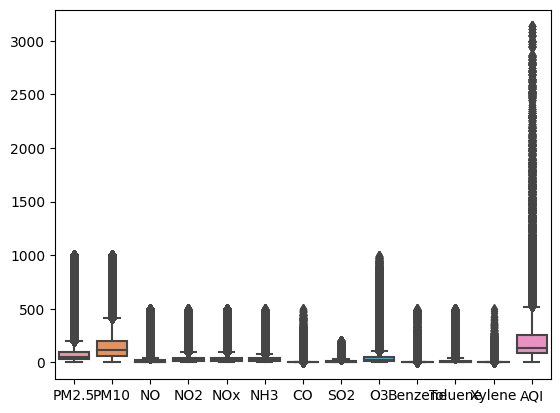

In [4]:
ax = sns.boxplot(data=df)

From the description of the AQI in kaggle, the value of AQI is rarely above 1000. We can see that there are date enteries upto 3000.

In [3]:
# Percentage of AQI entries above 1000
df[df['AQI']> 1000].shape[0]/df.shape[0] * 100

0.1053654904072214

In [4]:
df.drop(df[df.AQI > 1000].index, inplace=True)
df.describe()

PM2.5          PM10            NO           NO2           NOx   
count  1.938719e+06  1.469442e+06  2.032749e+06  2.057479e+06  2.095615e+06  \
mean   8.079691e+01  1.584340e+02  2.269648e+01  3.513759e+01  4.045004e+01   
std    8.947585e+01  1.396873e+02  4.826406e+01  3.478986e+01  5.574789e+01   
min    1.000000e-02  1.000000e-02  1.000000e-02  1.000000e-02  0.000000e+00   
25%    2.811000e+01  6.398000e+01  3.050000e+00  1.309000e+01  1.134000e+01   
50%    5.250000e+01  1.162500e+02  7.140000e+00  2.475000e+01  2.283000e+01   
75%    9.750000e+01  2.040000e+02  1.853000e+01  4.540000e+01  4.562000e+01   
max    1.000000e+03  1.000000e+03  5.000000e+02  4.999900e+02  5.000000e+02   

                NH3            CO           SO2            O3       Benzene   
count  1.352378e+06  2.087161e+06  1.844117e+06  1.860660e+06  1.724854e+06  \
mean   2.870922e+01  1.386579e+00  1.203381e+01  3.808618e+01  3.288109e+00   
std    2.753246e+01  3.704627e+00  1.438668e+01  4.712477e+01  1.209839e+01   
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00   
25%    1.123000e+01  4.100000e-01  4.250000e+00  1.103000e+01  8.000000e-02   
50%    2.235000e+01  8.000000e-01  8.230000e+00  2.477000e+01  9.500000e-01   
75%    3.778000e+01  1.380000e+00  1.450000e+01  4.957000e+01  3.220000e+00   
max    4.999700e+02  3.880400e+02  1.999600e+02  9.970000e+02  4.980700e+02   

            Toluene         Xylene           AQI  
count  1.544114e+06  511398.000000  2.016165e+06  
mean   1.483126e+01       2.392345  1.781195e+02  
std    3.313170e+01       8.826517  1.271949e+02  
min    0.000000e+00       0.000000  5.000000e+00  
25%    3.300000e-01       0.000000  8.400000e+01  
50%    3.380000e+00       0.200000  1.310000e+02  
75%    1.500000e+01       1.780000  2.580000e+02  
max    4.999900e+02     499.990000  1.000000e+03

Convert Datetime into pandas datetime format. 

In [5]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [8]:
print('Date starts from {}, and ends in {}'.format(df.Datetime.min().strftime('%Y-%m-%d'), df.Datetime.max().strftime('%Y-%m-%d')))

Date starts from 2015-01-01, and ends in 2020-07-01


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2586355 entries, 285144 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype         
---  ------      -----         
 0   StationId   object        
 1   Datetime    datetime64[ns]
 2   PM2.5       float64       
 3   PM10        float64       
 4   NO          float64       
 5   NO2         float64       
 6   NOx         float64       
 7   NH3         float64       
 8   CO          float64       
 9   SO2         float64       
 10  O3          float64       
 11  Benzene     float64       
 12  Toluene     float64       
 13  Xylene      float64       
 14  AQI         float64       
 15  AQI_Bucket  object        
dtypes: datetime64[ns](1), float64(13), object(2)
memory usage: 335.4+ MB


Correlation between pollutants and AQI

In [6]:
Cor = df.corr(numeric_only = True).AQI.sort_values(ascending = False)
Cor

AQI        1.000000
PM10       0.767608
PM2.5      0.719336
NO2        0.408338
NH3        0.390222
NOx        0.379202
NO         0.326048
CO         0.325609
SO2        0.273505
Toluene    0.262648
O3         0.152683
Benzene    0.102557
Xylene     0.065374
Name: AQI, dtype: float64

### 1.2. Handing missing Values

We can see there are missig (NaN) values from the above table. To see the percentage of missing values for each column, we use the following function.

In [7]:
df3 = df.copy()

In [12]:
print(df3.isnull().sum())

StationId           0
Datetime            0
PM2.5          647636
PM10          1116913
NO             553606
NO2            528876
NOx            490740
NH3           1233977
CO             499194
SO2            742238
O3             725695
Benzene        861501
Toluene       1042241
Xylene        2074957
AQI            570190
AQI_Bucket     570190
dtype: int64


In [8]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values= missing_values_table(df3)
missing_values

Your selected dataframe has 16 columns.
There are 14 columns that have missing values.


Missing Values  % of Total Values
Xylene             2074957               80.2
NH3                1233977               47.7
PM10               1116913               43.2
Toluene            1042241               40.3
Benzene             861501               33.3
SO2                 742238               28.7
O3                  725695               28.1
PM2.5               647636               25.0
AQI                 570190               22.0
AQI_Bucket          570190               22.0
NO                  553606               21.4
NO2                 528876               20.4
CO                  499194               19.3
NOx                 490740               19.0

We can see that 80% and close to 50% of data is missing for Xylene and NH3 respectively. If the majority of data is missing, usually it is safe to drop the column all together.

To hanlde missing values for the other columns, we can use:
 - with mean, median and mode imputation
 - with forward and backward filling
 - linear interpolation

#### Mean, median and mode imputation

Let's use SimpleImputer from sklearn:

In [10]:
df3 = df3.set_index('Datetime').sort_values(by = ['StationId','Datetime'])

In [11]:
from sklearn.impute import SimpleImputer

for method in ["mean", "median", "most_frequent"]:
    df3[method] = SimpleImputer(strategy=method).fit_transform(
        df3["NH3"].values.reshape(-1, 1)
    )

This will calculate mean, median and mode for column NH3 to fill the missing values.

#### Forward and Backward filling

Still for the same NH3 column, we can fill nan values:

In [12]:
# fill NaN of NH3 column with forward and backward fill
df3["ffill"] = df3["NH3"].ffill()
df3["bfill"] = df3["NH3"].bfill()

#### Linear interpolation

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [13]:
# interpolate for NH3 column
df3["interpolated"] = df3["NH3"].interpolate(limit_direction="both")

We will use the following function to plot the original distribution before and after an imputation(s) is performed:

In [19]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=3, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=1, label=key, ax=ax)

    plt.legend()
    plt.show();

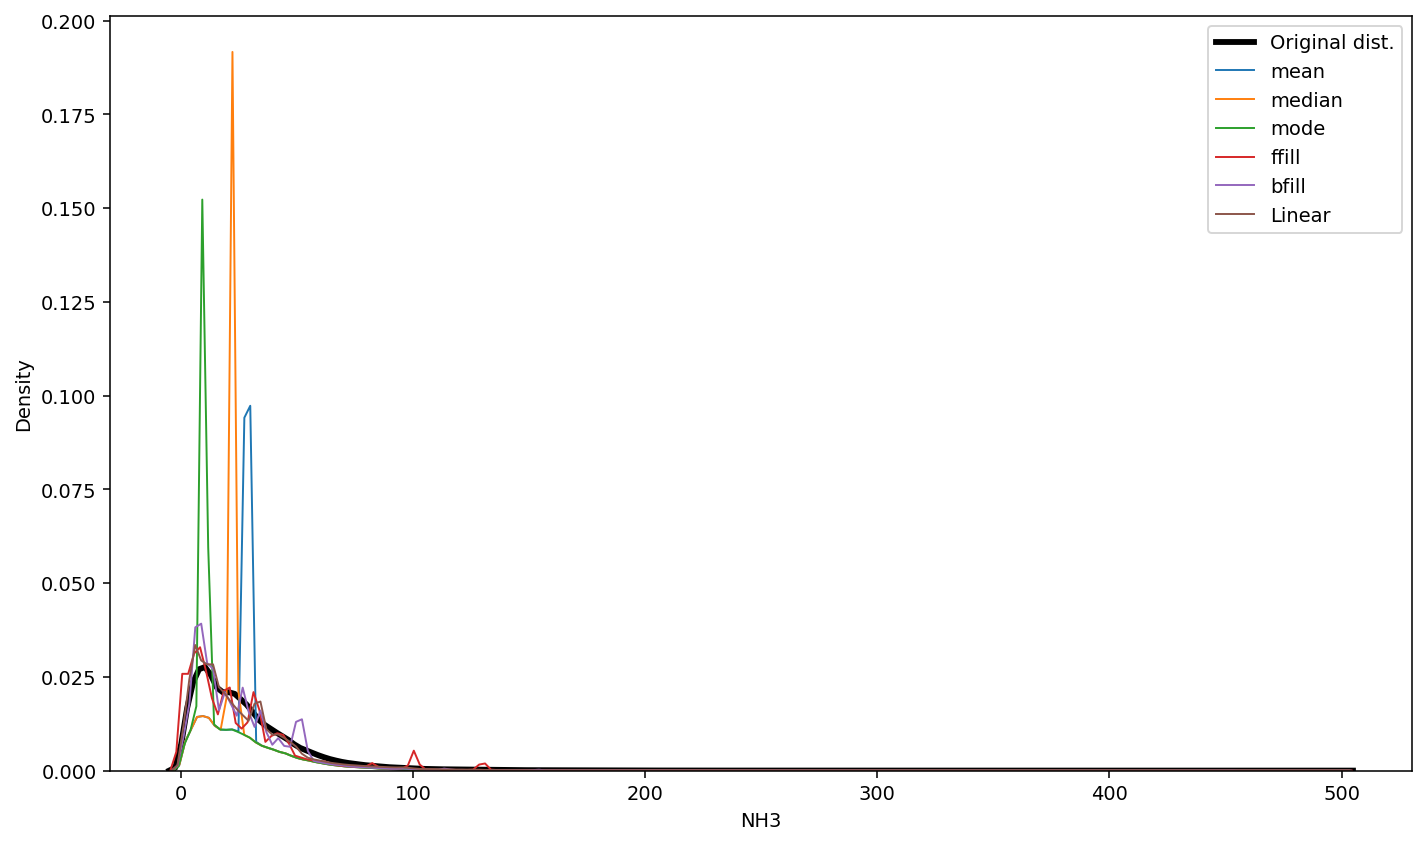

In [20]:
compare_dists(
    df3["NH3"],
    {"mean": df3["mean"], "median": df3["median"], "mode": df3["most_frequent"], "ffill":df3["ffill"], 
     "bfill":df3["bfill"], "Linear":df3["interpolated"]},)

We can see that forward filling, backward filling and Linear interpolation provide a plot close to the original distribution, as is the case for time series data. We can repeat the same for the other colums to decide which method to use. 

Let's drop mean, median and mode and repeat the plot for visiblity.

In [14]:
df3.drop(["mean", "median", "most_frequent"], axis=1, inplace=True)

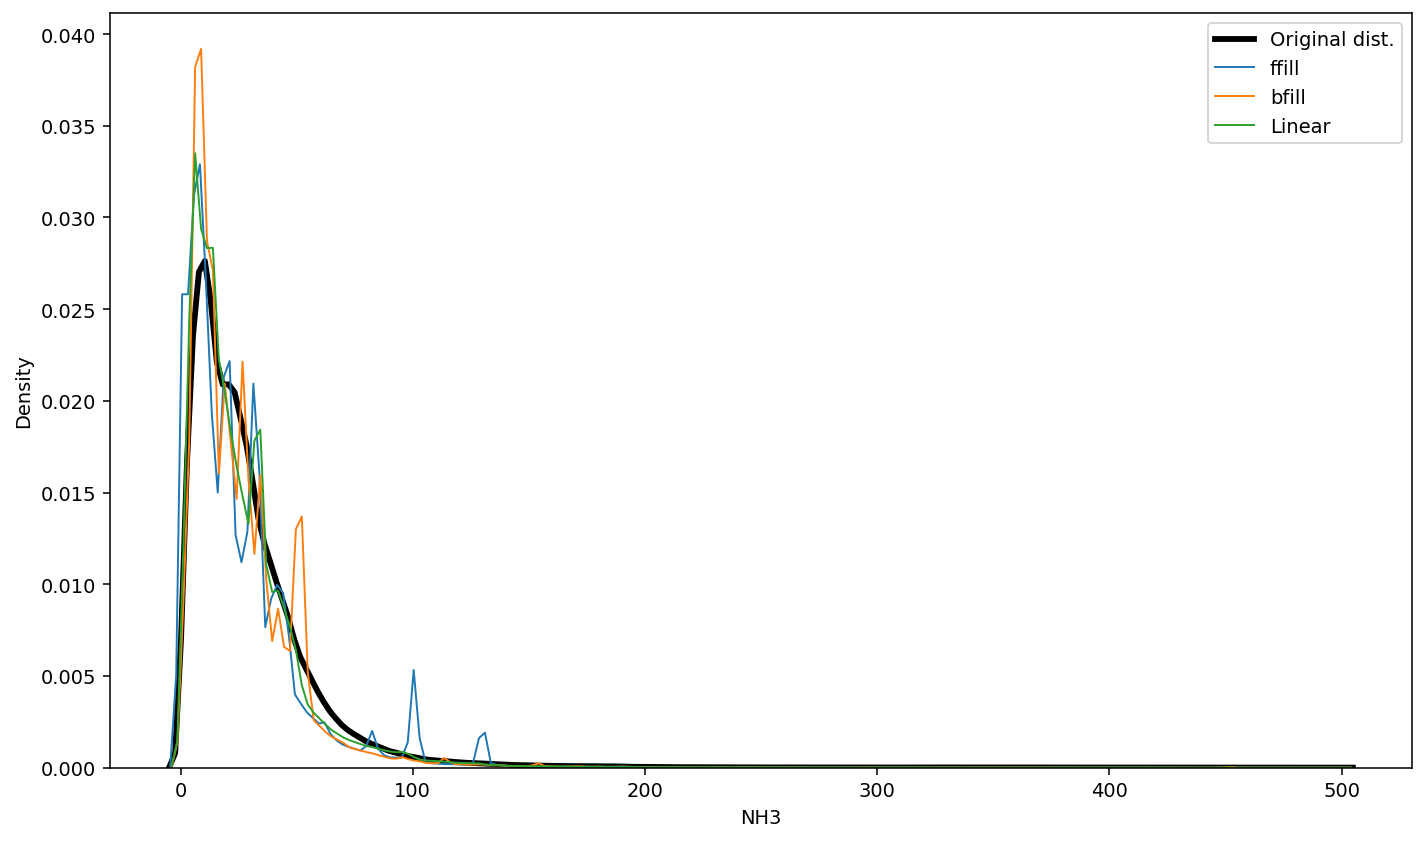

In [22]:
compare_dists(
    df3["NH3"],
    {"ffill":df3["ffill"], "bfill":df3["bfill"], "Linear":df3["interpolated"]},)

For NH3 all appear closer to the original disttribution. 

#### Repeat for PM10

In [15]:
# fill NaN of PM10 column with forward and backward fill
df3["PM10_ffill"] = df3["PM10"].ffill()
df3["PM10_bfill"] = df3["PM10"].bfill()

In [16]:
# interpolate for PM10 column
df3["PM10_interpolated"] = df3["PM10"].interpolate(limit_direction="both")

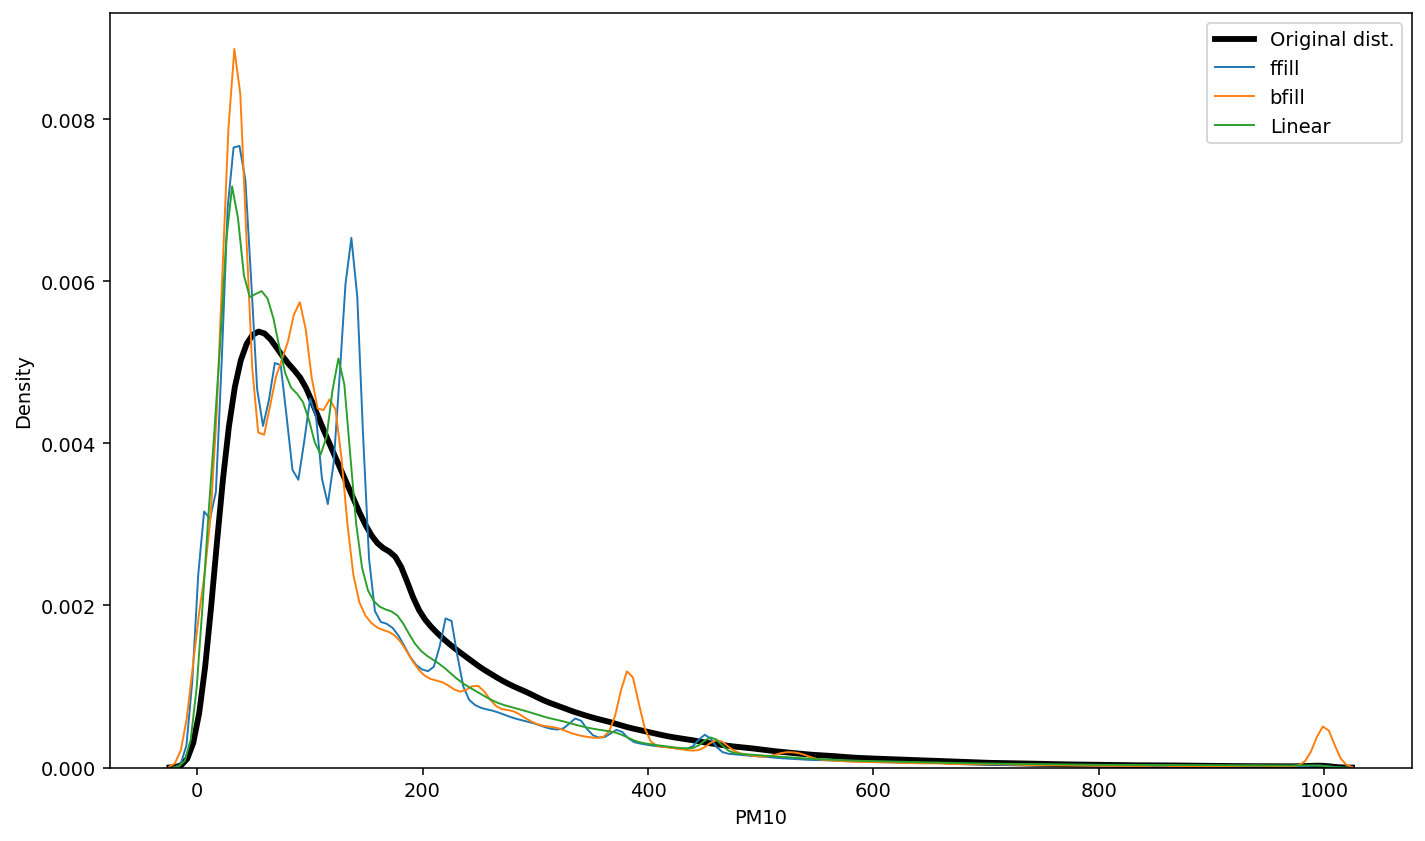

In [25]:
compare_dists(
    df3["PM10"],
    {"ffill":df3["PM10_ffill"], "bfill":df3["PM10_bfill"], "Linear":df3["PM10_interpolated"]},)

In [17]:
pollutants = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene','Xylene']
inter = df3.loc[:, pollutants].interpolate(method = 'time', limit_direction="both"); 
df3.loc[:, pollutants] = inter


In [27]:
df3.head(3)

StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO   
Datetime                                                                        
2017-11-24 17:00:00     AP001  60.50   98.00  2.35  30.80  18.25   8.50  0.10  \
2017-11-24 18:00:00     AP001  65.50  111.25  2.70  24.20  15.07   9.77  0.10   
2017-11-24 19:00:00     AP001  80.00  132.00  2.10  25.18  15.15  12.02  0.10   
2017-11-24 20:00:00     AP001  81.50  133.25  1.95  16.25  10.23  11.58  0.10   
2017-11-24 21:00:00     AP001  75.25  116.00  1.43  17.48  10.43  12.03  0.10   
...                       ...    ...     ...   ...    ...    ...    ...   ...   
2020-06-30 20:00:00     WB013  15.55   47.80  7.27  35.08  42.38  31.25  0.80   
2020-06-30 21:00:00     WB013  15.23   42.30  6.10  26.78  32.85  30.66  0.56   
2020-06-30 22:00:00     WB013  11.40   40.95  6.58  19.53  26.12  30.73  0.61   
2020-06-30 23:00:00     WB013   9.25   34.33  9.17  21.85  31.00  29.61  0.65   
2020-07-01 00:00:00     WB013  10.50   36.50  7.78  22.50  30.25  27.23  0.58   

                       SO2      O3  ...  Toluene  Xylene   AQI    AQI_Bucket   
Datetime                            ...                                        
2017-11-24 17:00:00  11.85  126.40  ...     6.10    0.10   NaN           NaN  \
2017-11-24 18:00:00  13.17  117.12  ...     6.25    0.15   NaN           NaN   
2017-11-24 19:00:00  12.08   98.98  ...     5.98    0.18   NaN           NaN   
2017-11-24 20:00:00  10.47  112.20  ...     6.72    0.10   NaN           NaN   
2017-11-24 21:00:00   9.12  106.35  ...     5.75    0.08   NaN           NaN   
...                    ...     ...  ...      ...     ...   ...           ...   
2020-06-30 20:00:00   9.40   17.24  ...    11.57    0.00  59.0  Satisfactory   
2020-06-30 21:00:00   4.91   17.46  ...    12.29    1.63  59.0  Satisfactory   
2020-06-30 22:00:00   3.81   17.24  ...     8.88    0.55  59.0  Satisfactory   
2020-06-30 23:00:00   3.44   12.74  ...     8.43    1.63  59.0  Satisfactory   
2020-07-01 00:00:00   2.80   13.10  ...     7.39    4.18  59.0  Satisfactory   

                     ffill  bfill  interpolated  PM10_ffill  PM10_bfill   
Datetime                                                                  
2017-11-24 17:00:00   8.50   8.50          8.50       98.00       98.00  \
2017-11-24 18:00:00   9.77   9.77          9.77      111.25      111.25   
2017-11-24 19:00:00  12.02  12.02         12.02      132.00      132.00   
2017-11-24 20:00:00  11.58  11.58         11.58      133.25      133.25   
2017-11-24 21:00:00  12.03  12.03         12.03      116.00      116.00   
...                    ...    ...           ...         ...         ...   
2020-06-30 20:00:00  31.25  31.25         31.25       47.80       47.80   
2020-06-30 21:00:00  30.66  30.66         30.66       42.30       42.30   
2020-06-30 22:00:00  30.73  30.73         30.73       40.95       40.95   
2020-06-30 23:00:00  29.61  29.61         29.61       34.33       34.33   
2020-07-01 00:00:00  27.23  27.23         27.23       36.50       36.50   

                     PM10_interpolated  
Datetime                                
2017-11-24 17:00:00              98.00  
2017-11-24 18:00:00             111.25  
2017-11-24 19:00:00             132.00  
2017-11-24 20:00:00             133.25  
2017-11-24 21:00:00             116.00  
...                                ...  
2020-06-30 20:00:00              47.80  
2020-06-30 21:00:00              42.30  
2020-06-30 22:00:00              40.95  
2020-06-30 23:00:00              34.33  
2020-07-01 00:00:00              36.50  

[2586355 rows x 21 columns]

From the explanation for AQI index calculation, we can follow the same steps used to calculate AQI and fill the missing values of AQI_Bucket based on the the calcualted AQI.

#### AQI Calculation

In [18]:
df3["PM10_24hr_avg"] = df3.groupby("StationId")["PM10"].rolling(window = 24, min_periods = 16).mean().values
df3["PM2.5_24hr_avg"] = df3.groupby("StationId")["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
df3["SO2_24hr_avg"] = df3.groupby("StationId")["SO2"].rolling(window = 24, min_periods = 16).mean().values
df3["NOx_24hr_avg"] = df3.groupby("StationId")["NOx"].rolling(window = 24, min_periods = 16).mean().values
df3["NH3_24hr_avg"] = df3.groupby("StationId")["NH3"].rolling(window = 24, min_periods = 16).mean().values
df3["CO_8hr_max"] = df3.groupby("StationId")["CO"].rolling(window = 8, min_periods = 1).max().values
df3["O3_8hr_max"] = df3.groupby("StationId")["O3"].rolling(window = 8, min_periods = 1).max().values

#### PM2.5

In [19]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df3["PM2.5_SubIndex"] = df3["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

#### PM10

In [20]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df3["PM10_SubIndex"] = df3["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

#### SO2

In [21]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df3["SO2_SubIndex"] = df3["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

#### NOx (Any Nitric x-oxide)

In [22]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df3["NOx_SubIndex"] = df3["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

#### NH3 (Ammonia)

In [23]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df3["NH3_SubIndex"] = df3["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

#### CO (Carbon Monoxide)

In [24]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df3["CO_SubIndex"] = df3["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

#### O3 (Ozone or Trioxygen)

In [25]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df3["O3_SubIndex"] = df3["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

#### AQI

In [26]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df3["Checks"] = (df3["PM2.5_SubIndex"] > 0).astype(int) + \
                (df3["PM10_SubIndex"] > 0).astype(int) + \
                (df3["SO2_SubIndex"] > 0).astype(int) + \
                (df3["NOx_SubIndex"] > 0).astype(int) + \
                (df3["NH3_SubIndex"] > 0).astype(int) + \
                (df3["CO_SubIndex"] > 0).astype(int) + \
                (df3["O3_SubIndex"] > 0).astype(int)

df3["AQI_calculated"] = round(df3[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df3.loc[df3["PM2.5_SubIndex"] + df3["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df3.loc[df3.Checks < 3, "AQI_calculated"] = np.NaN

df3["AQI_bucket_calculated"] = df3["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))

df3[~df3.AQI_calculated.isna()].head(3)


StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO   
Datetime                                                                        
2017-11-25 08:00:00     AP001  314.0  218.36  2.17  12.20  42.87  22.52  0.85  \
2017-11-25 09:00:00     AP001  104.0  148.50  1.93  23.00  13.75   9.80  0.10   
2017-11-25 10:00:00     AP001   94.5  142.00  1.33  16.25   9.75   9.65  0.10   

                       SO2      O3  ...  PM2.5_SubIndex  PM10_SubIndex   
Datetime                            ...                                  
2017-11-25 08:00:00  21.78    0.16  ...      199.218750     115.473333  \
2017-11-25 09:00:00  15.30  117.62  ...      202.009804     116.465098   
2017-11-25 10:00:00  17.00  136.23  ...      202.731481     117.105926   

                     SO2_SubIndex  NOx_SubIndex NH3_SubIndex  CO_SubIndex   
Datetime                                                                    
2017-11-25 08:00:00     14.855469     17.641406     3.043594         42.5  \
2017-11-25 09:00:00     15.106618     17.614706     3.008676         42.5   
2017-11-25 10:00:00     15.447917     17.313194     2.975556         42.5   

                     O3_SubIndex  Checks  AQI_calculated   
Datetime                                                   
2017-11-25 08:00:00   131.617647       7           199.0  \
2017-11-25 09:00:00   125.911765       7           202.0   
2017-11-25 10:00:00   153.279412       7           203.0   

                     AQI_bucket_calculated  
Datetime                                    
2017-11-25 08:00:00               Moderate  
2017-11-25 09:00:00                   Poor  
2017-11-25 10:00:00                   Poor  

[3 rows x 38 columns]

In [27]:
df3[~df3.AQI_calculated.isna()].AQI_bucket_calculated.value_counts()

AQI_bucket_calculated
Moderate        964797
Satisfactory    513796
Very Poor       473129
Poor            390346
Severe          150594
Good             92043
Name: count, dtype: int64

In [38]:
print(df3.isnull().sum()/df3.shape[0] * 100)

StationId                 0.000000
PM2.5                     0.000000
PM10                      0.000000
NO                        0.000000
NO2                       0.000000
NOx                       0.000000
NH3                       0.000000
CO                        0.000000
SO2                       0.000000
O3                        0.000000
Benzene                   0.000000
Toluene                   0.000000
Xylene                    0.000000
AQI                      22.046084
AQI_Bucket               22.046084
ffill                     0.000000
bfill                     0.000000
interpolated              0.000000
PM10_ffill                0.000000
PM10_bfill                0.000000
PM10_interpolated         0.000000
PM10_24hr_avg             0.063796
PM2.5_24hr_avg            0.063796
SO2_24hr_avg              0.063796
NOx_24hr_avg              0.063796
NH3_24hr_avg              0.063796
CO_8hr_max                0.000000
O3_8hr_max                0.000000
PM2.5_SubIndex      

We can drop the remaining NAN values since they account only 0.06% of the data.

In [28]:
df3 = df3[~df3.AQI_calculated.isna()]

In [29]:
df3=df3.drop(['ffill', 'bfill', 'interpolated', 'PM10_ffill','PM10_bfill','PM10_interpolated', 'AQI', 'AQI_Bucket'], axis=1)

In [30]:
df3 = df3.rename(columns={'AQI_calculated': 'AQI', 'AQI_bucket_calculated': 'AQI_Bucket'})

In [225]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2584705 entries, 2017-11-25 08:00:00 to 2020-07-01 00:00:00
Data columns (total 30 columns):
 #   Column          Dtype  
---  ------          -----  
 0   StationId       object 
 1   PM2.5           float64
 2   PM10            float64
 3   NO              float64
 4   NO2             float64
 5   NOx             float64
 6   NH3             float64
 7   CO              float64
 8   SO2             float64
 9   O3              float64
 10  Benzene         float64
 11  Toluene         float64
 12  Xylene          float64
 13  PM10_24hr_avg   float64
 14  PM2.5_24hr_avg  float64
 15  SO2_24hr_avg    float64
 16  NOx_24hr_avg    float64
 17  NH3_24hr_avg    float64
 18  CO_8hr_max      float64
 19  O3_8hr_max      float64
 20  PM2.5_SubIndex  float64
 21  PM10_SubIndex   float64
 22  SO2_SubIndex    float64
 23  NOx_SubIndex    float64
 24  NH3_SubIndex    float64
 25  CO_SubIndex     float64
 26  O3_SubIndex     float64
 27  Checks  

## 3. Explanatory Data Analysis 

In [32]:
df4 = df3.copy()

### Most polluted stations for highly correlated pollutants

In [33]:
# correlation afer new features are added  
corr_ext = df4.corr(numeric_only = True).AQI.sort_values(ascending = False)
major_pollutants = (corr_ext[corr_ext>0.5]).index
major_pollutants.tolist()

['AQI',
 'PM2.5_SubIndex',
 'PM2.5_24hr_avg',
 'PM10_24hr_avg',
 'PM10_SubIndex',
 'PM2.5',
 'PM10',
 'CO_SubIndex']

In [34]:
major_pollutants.insert(0, 'StationId')

Index(['StationId', 'AQI', 'PM2.5_SubIndex', 'PM2.5_24hr_avg', 'PM10_24hr_avg',
       'PM10_SubIndex', 'PM2.5', 'PM10', 'CO_SubIndex'],
      dtype='object')

In [35]:
most_polluted = df4.groupby(['StationId'])[major_pollutants].mean().sort_values(by = 'AQI', ascending = False).head(5)
most_polluted

AQI  PM2.5_SubIndex  PM2.5_24hr_avg  PM10_24hr_avg   
StationId                                                              
GJ001      319.378577      150.512882       76.004528     165.744721  \
DL002      310.571699      238.322695      135.054147     296.831982   
DL028      274.632880      208.158962      112.758675     134.091122   
DL038      269.730716      228.803371      126.967274     271.867159   
DL020      265.610949      216.114350      121.987045     263.574578   

           PM10_SubIndex       PM2.5        PM10  CO_SubIndex  
StationId                                                      
GJ001         145.177296   75.927363  165.605159   263.945141  
DL002         275.912778  135.051371  296.808978   111.113549  
DL028         120.015068  112.745352  134.093209    85.765622  
DL038         244.559199  126.889543  271.688092    88.071505  
DL020         239.971677  121.987999  263.553739    78.847719

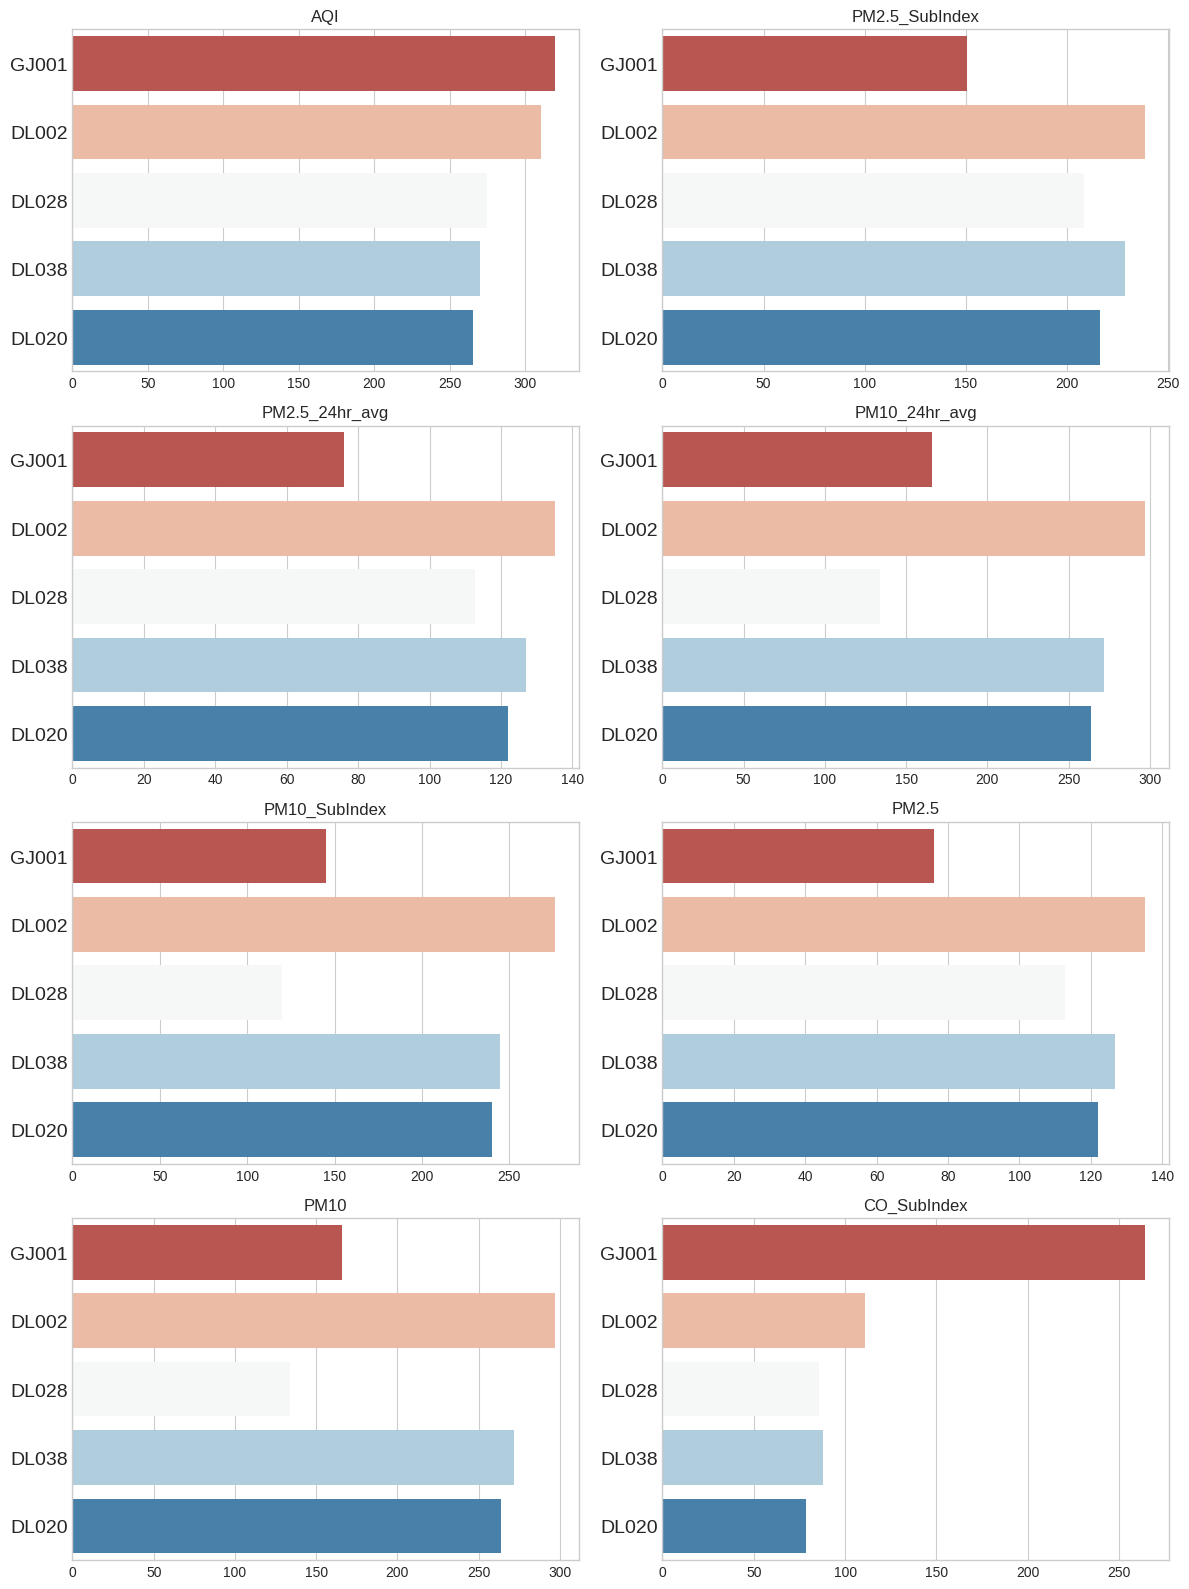

In [123]:
plt.style.use('seaborn-whitegrid')
f, ax_ = plt.subplots((len(major_pollutants) + 1) // 2, 2, figsize = (12,16))

axes = ax_.flatten()

    
for i, pol in enumerate(major_pollutants):
    ax = axes[i]
    sns.barplot(x = most_polluted[pol],
                y = most_polluted.index,
                palette = 'RdBu', ax = ax);
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_yticklabels(labels=ax.get_yticklabels(), fontsize=14)
    ax.set_title(pol)
f.tight_layout()

It appears that CO_SubIndex has a significant impact on AQI. Despite station GJ001 having relatively lower levels of other pollutants, its high AQI value could be attributed to the influence of CO_SubIndex or missing data.

### Looking at the pollutants and their distribution

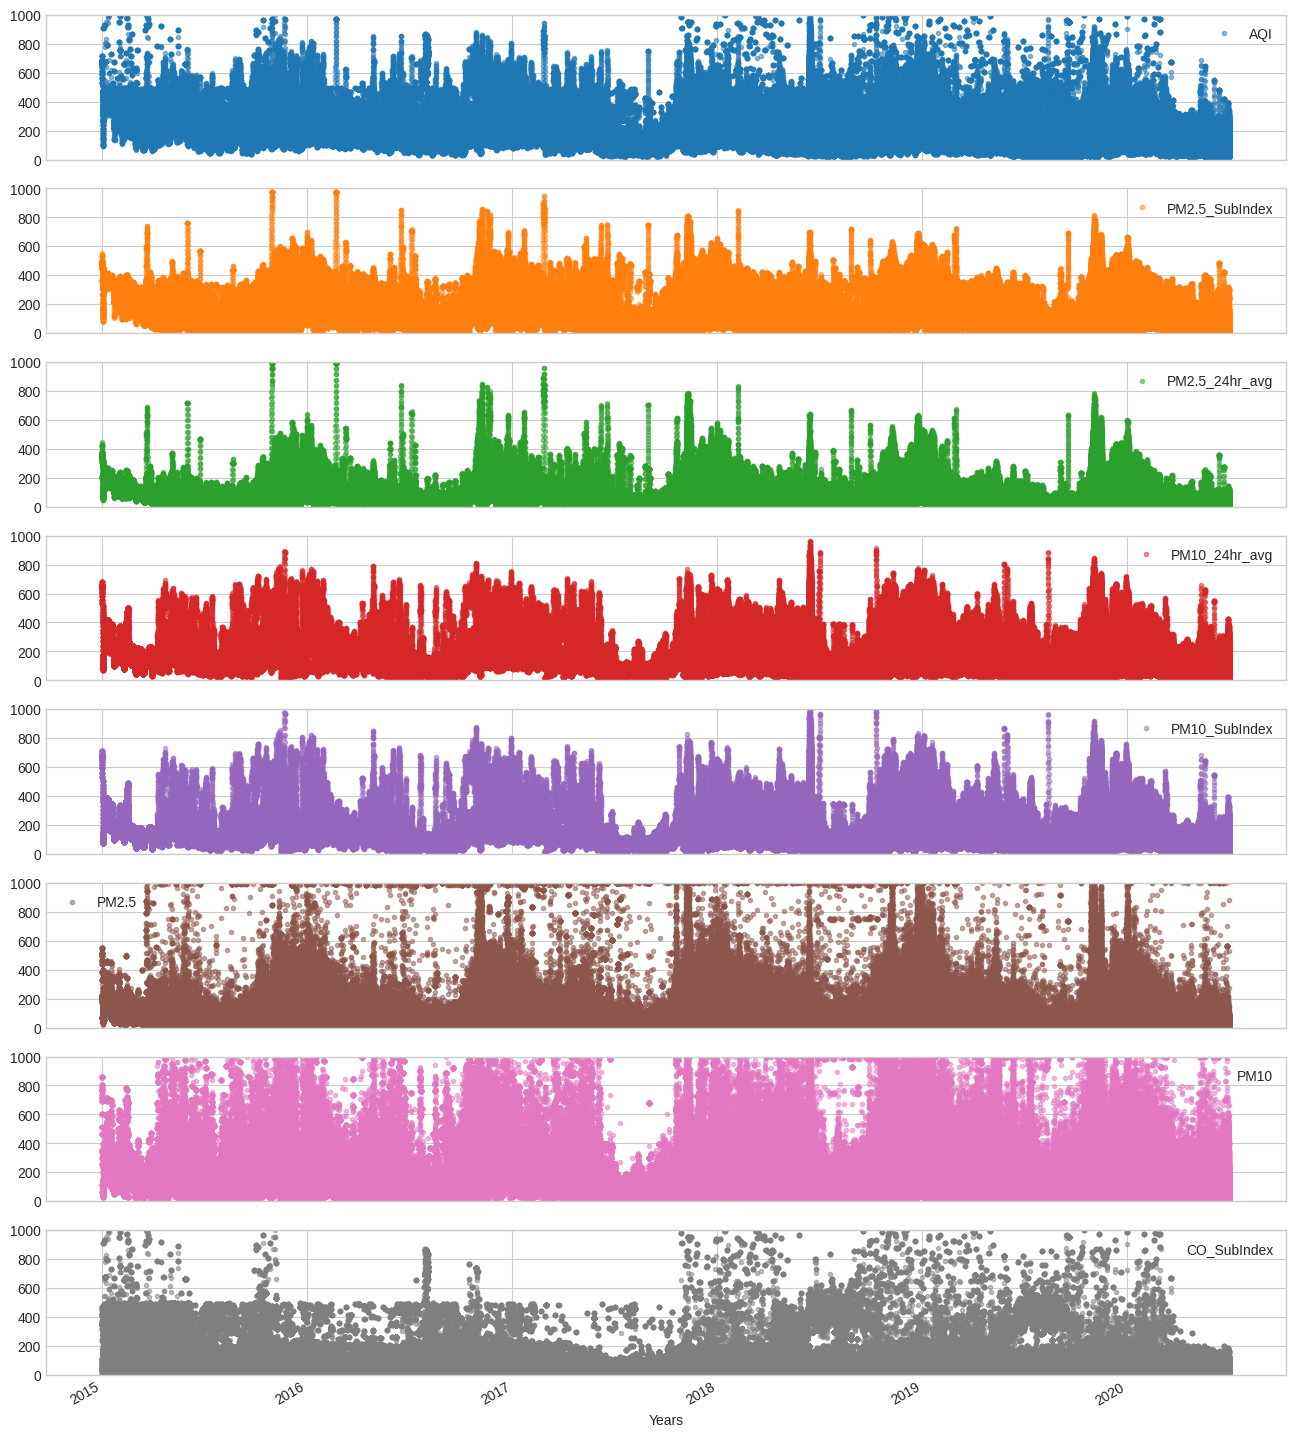

In [124]:
axes = df4[major_pollutants].plot(marker='.',alpha = 0.5, linestyle = 'None', figsize = (16,20), subplots = True)
for ax in axes:
    ax.set_xlabel('Years')
    ax.set_ylim(0,1000)

From the plots, we can make the following observations:
 - PM10 has high value
 - most exhibited seasonality though further observations are required
 - all pollutants exhibt low values between 2017 and 2018. Either some phenomenon that affected the values or because of missing data

In [43]:
mask = (df['Datetime'] >= '2017-01-01') & (df['Datetime'] <= '2018-01-01')
filtered_df = df.loc[mask]

In [45]:
filtered_df.isna().sum()

StationId          0
Datetime           0
PM2.5         179893
PM10          238813
NO            168918
NO2           165854
NOx           141419
NH3           247703
CO            119957
SO2           190278
O3            197210
Benzene       138467
Toluene       147197
Xylene        242330
AQI           173173
AQI_Bucket    173173
dtype: int64

#### Let's see the correlation of the major pollutants.


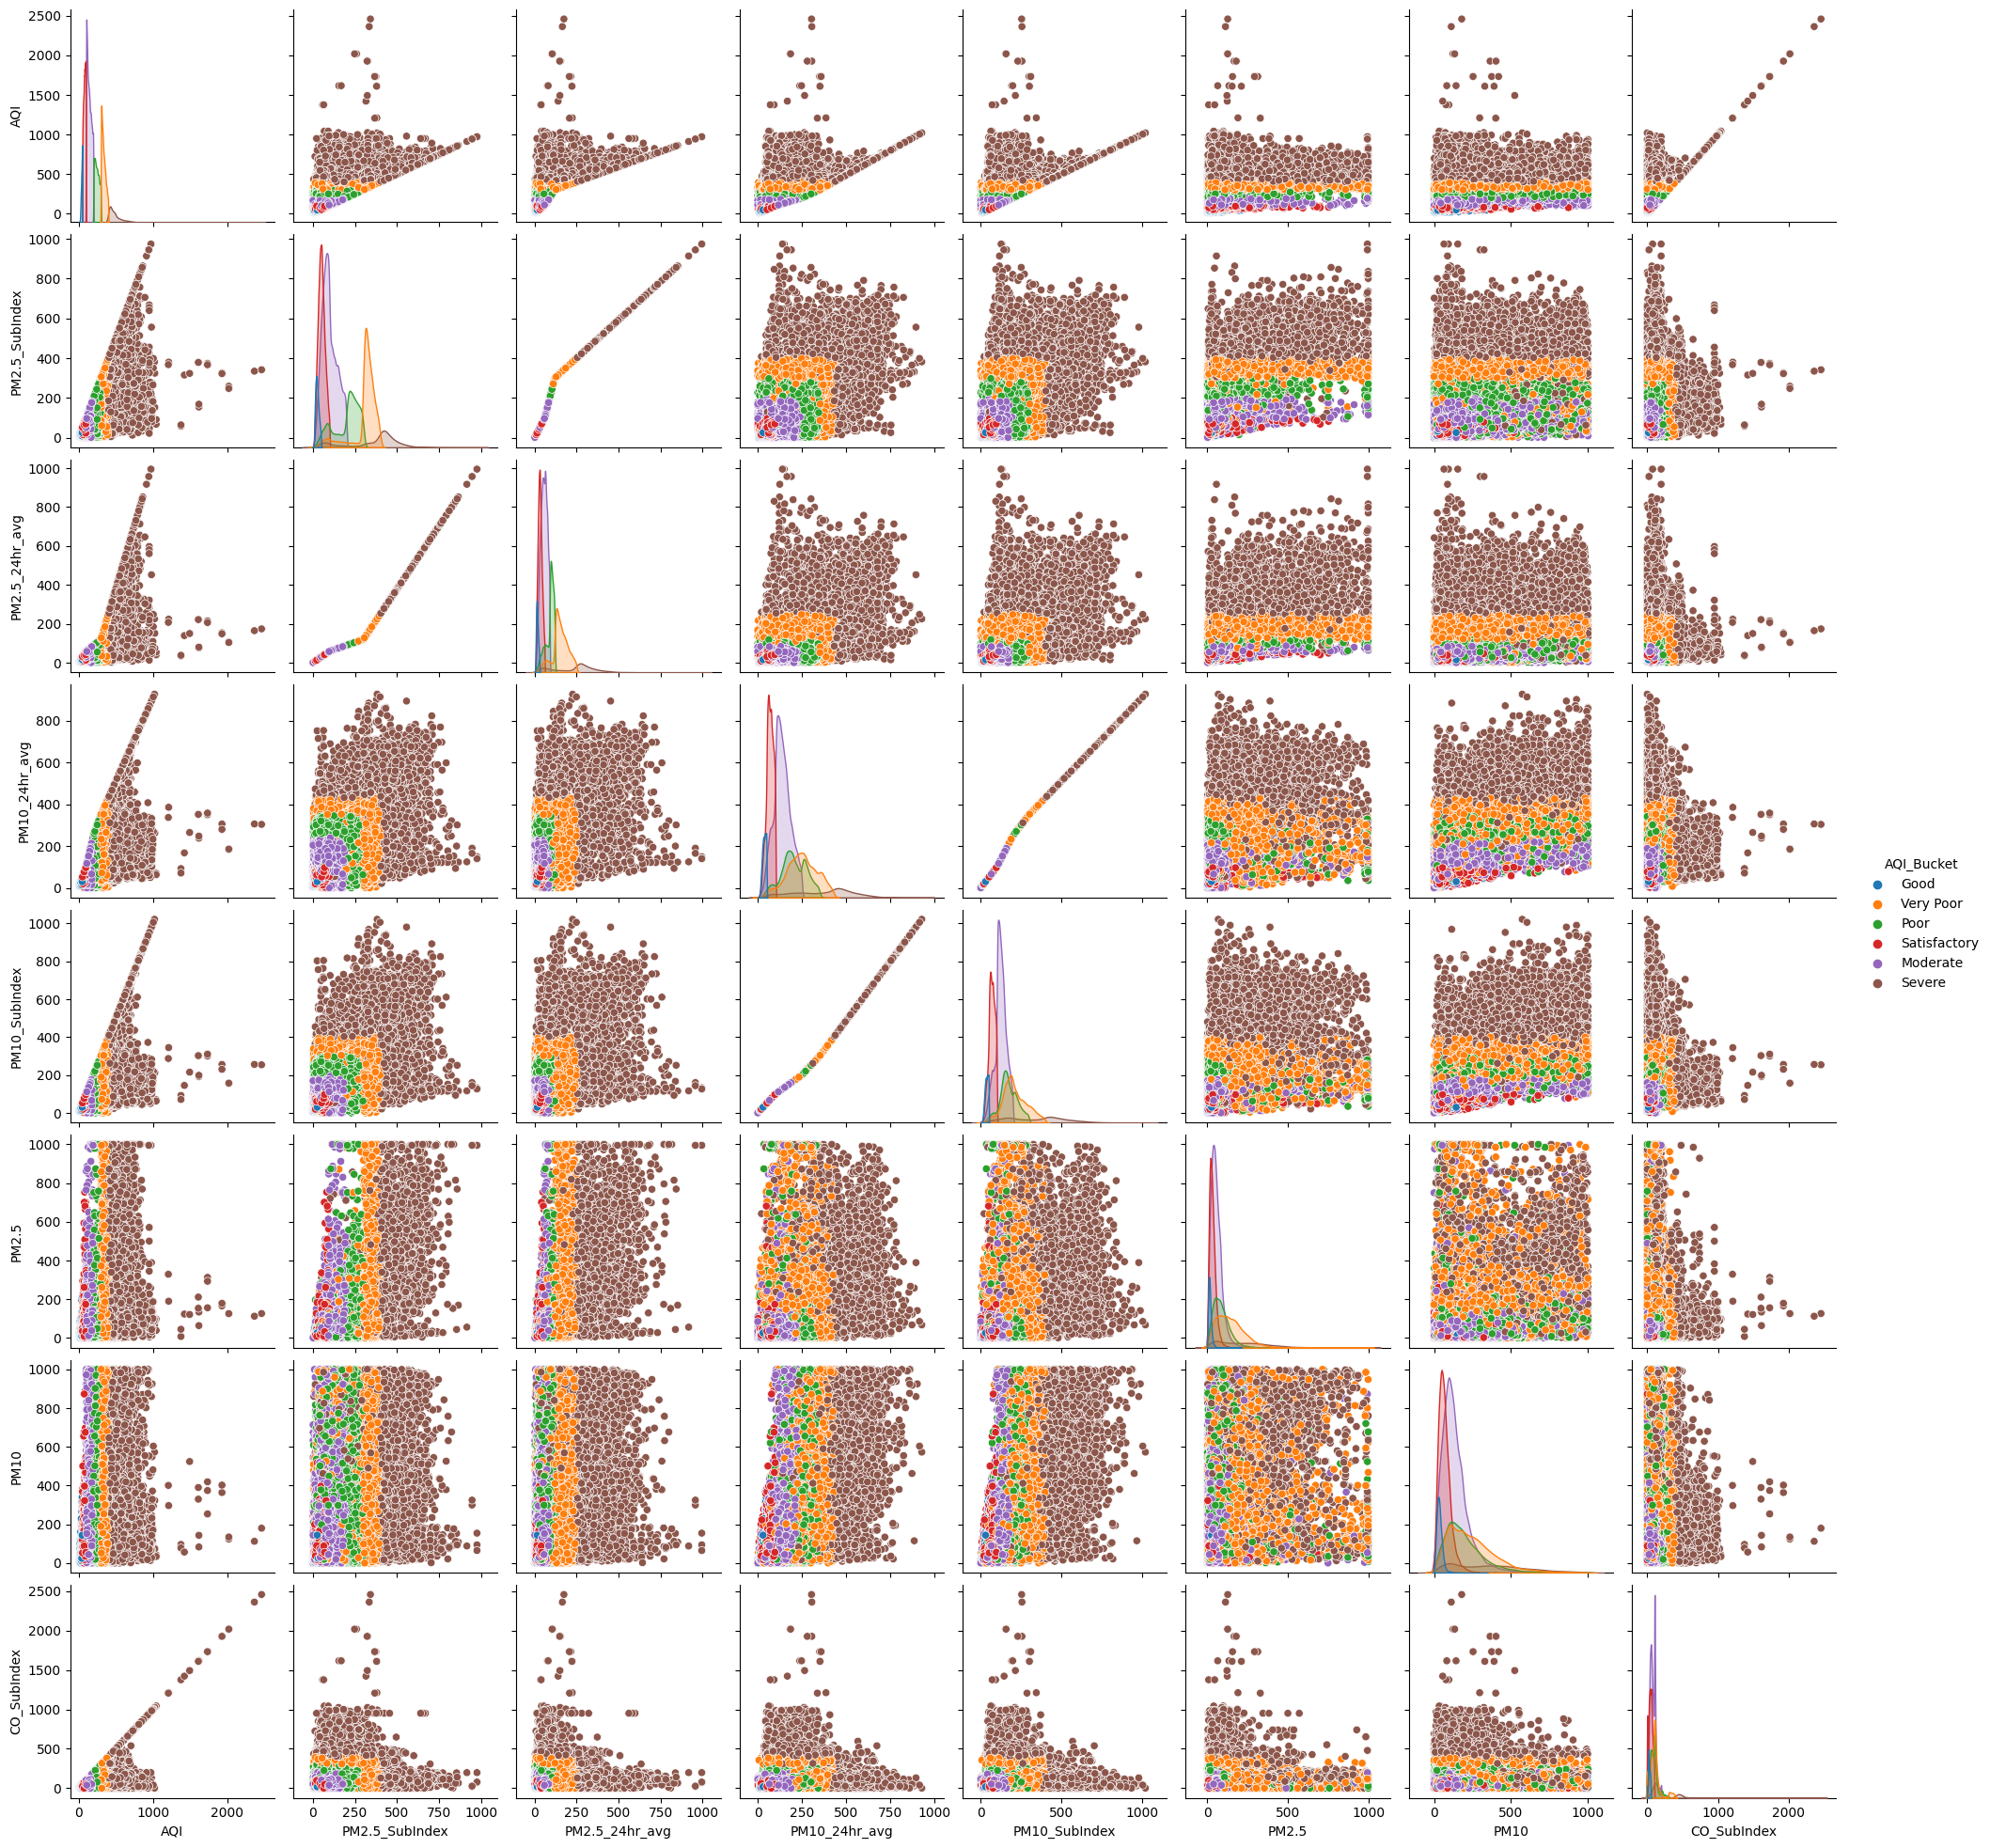

In [38]:
sns.pairplot(df4.sample(frac=0.1).reset_index(), vars=major_pollutants, hue ='AQI_Bucket')

Overall: Most variables show normal distribution skewed to the right 
 - AQI: There appears to be more data points for satisfactory and moderate AQI
 

In [54]:
def plot_(df, pollutants, stations):
    # Calculate the number of rows and columns for the grid
    num_rows = int(len(pollutants) / 2) + len(pollutants) % 2
    num_cols = 2

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))

    # Flatten the axes array to easily iterate over the subplots
    axes = axes.flatten()

    # Plot each pollutant for all stations
    for i, pol in enumerate(pollutants):
        ax = axes[i]
        for st in stations:
            df.loc[st][pol].plot(ax=ax, label=st)
        #ax.set_xlabel('Hour')
        ax.set_title(f'{pol} Variation over Time')
        ax.legend()

    # Hide any unused subplots
    for j in range(len(pollutants), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

#### Seasonality in the data¶
Let's convert the data into daily, weekly, and monthly versions.

In [36]:
df4['Year'] = df4.index.year
df4['Month'] = df4.index.month
df4['Week'] = df4.index.dayofweek
df4['Day'] = df4.index.day
df4['Hour'] = df4.index.hour

In [41]:
df4.head(3)

StationId  PM2.5    PM10    NO    NO2    NOx    NH3    CO   
Datetime                                                                        
2017-11-25 08:00:00     AP001  314.0  218.36  2.17  12.20  42.87  22.52  0.85  \
2017-11-25 09:00:00     AP001  104.0  148.50  1.93  23.00  13.75   9.80  0.10   
2017-11-25 10:00:00     AP001   94.5  142.00  1.33  16.25   9.75   9.65  0.10   

                       SO2      O3  ...  CO_SubIndex  O3_SubIndex  Checks   
Datetime                            ...                                     
2017-11-25 08:00:00  21.78    0.16  ...         42.5   131.617647       7  \
2017-11-25 09:00:00  15.30  117.62  ...         42.5   125.911765       7   
2017-11-25 10:00:00  17.00  136.23  ...         42.5   153.279412       7   

                       AQI  AQI_Bucket  Year  Month  Week  Day  Hour  
Datetime                                                              
2017-11-25 08:00:00  199.0    Moderate  2017     11     5   25     8  
2017-11-25 09:00:00  202.0        Poor  2017     11     5   25     9  
2017-11-25 10:00:00  203.0        Poor  2017     11     5   25    10  

[3 rows x 35 columns]

In [50]:
hour_day = df4.groupby(['StationId', 'Hour'])[major_pollutants].mean()

In [51]:
hour_day.head(3)

AQI  PM2.5_SubIndex  PM2.5_24hr_avg  PM10_24hr_avg   
StationId Hour                                                              
AP001     0     110.860906       82.043054       43.039829      86.436156  \
          1     108.764768       82.066440       43.060924      86.488292   
          2     107.398734       81.980444       43.058738      86.484743   

                PM10_SubIndex      PM2.5       PM10  CO_SubIndex  
StationId Hour                                                    
AP001     0         81.493065  49.140832  94.203751    55.620610  
          1         81.519935  47.375032  92.259831    56.452015  
          2         81.497717  44.973523  90.178745    56.634486

In [52]:
day_week = df4.groupby(['StationId', 'Week'])[attr].mean()
month_year = df4.groupby(['StationId', 'Month'])[attr].mean()

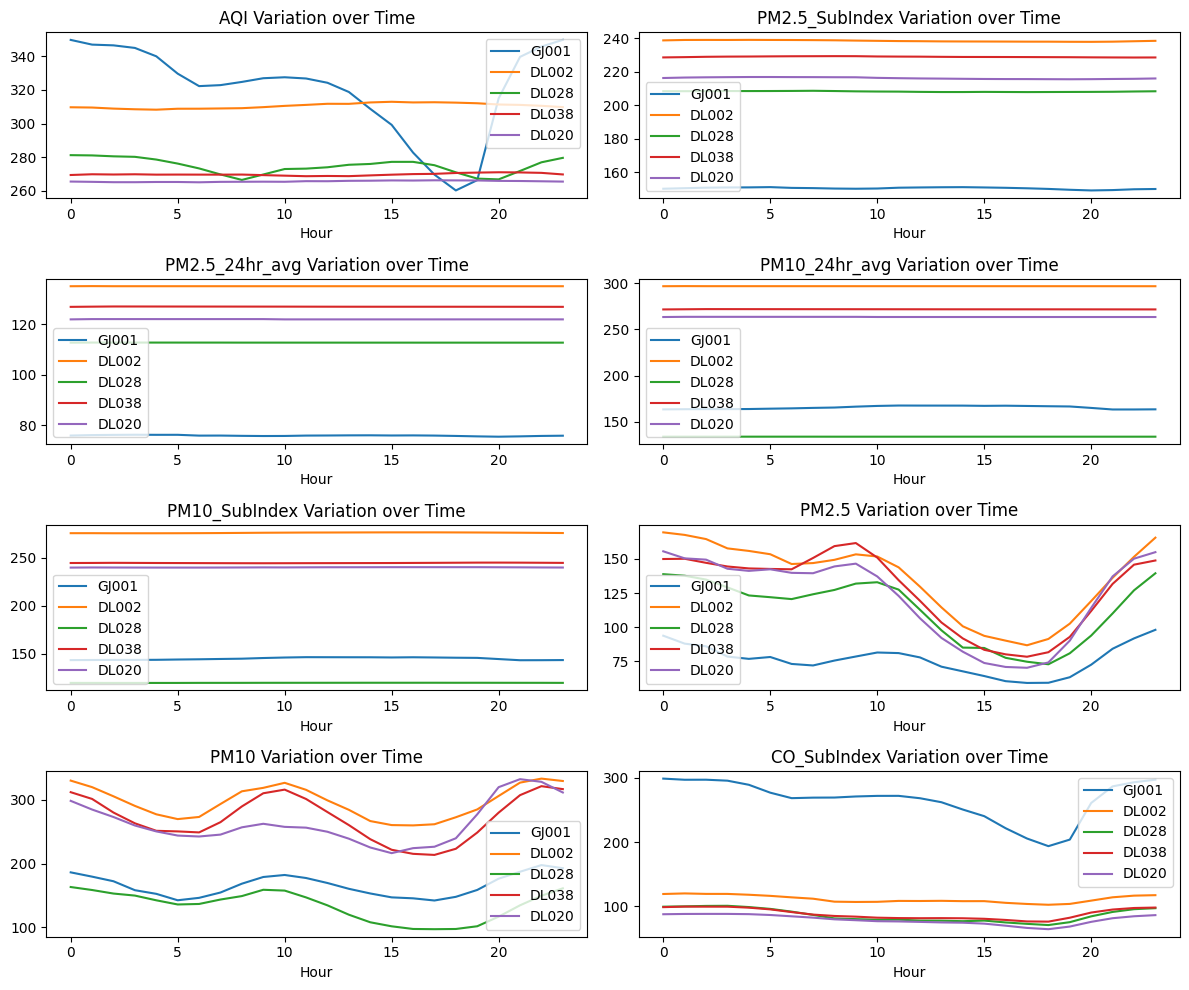

In [55]:
plot_(hour_day, major_pollutants, most_polluted.index)
#hour_day.plot(x="Hour", y=pollutants)

The concentration of pollutants exhibits a pattern throughout the day, with the low levels occurring around dawn and early evening; and the high levels around 10 o'clock. 
The average AQI remains constant, as expected based on its calculation method. Consequently, employing an **hourly prediction window is not suitable** in this scenario.

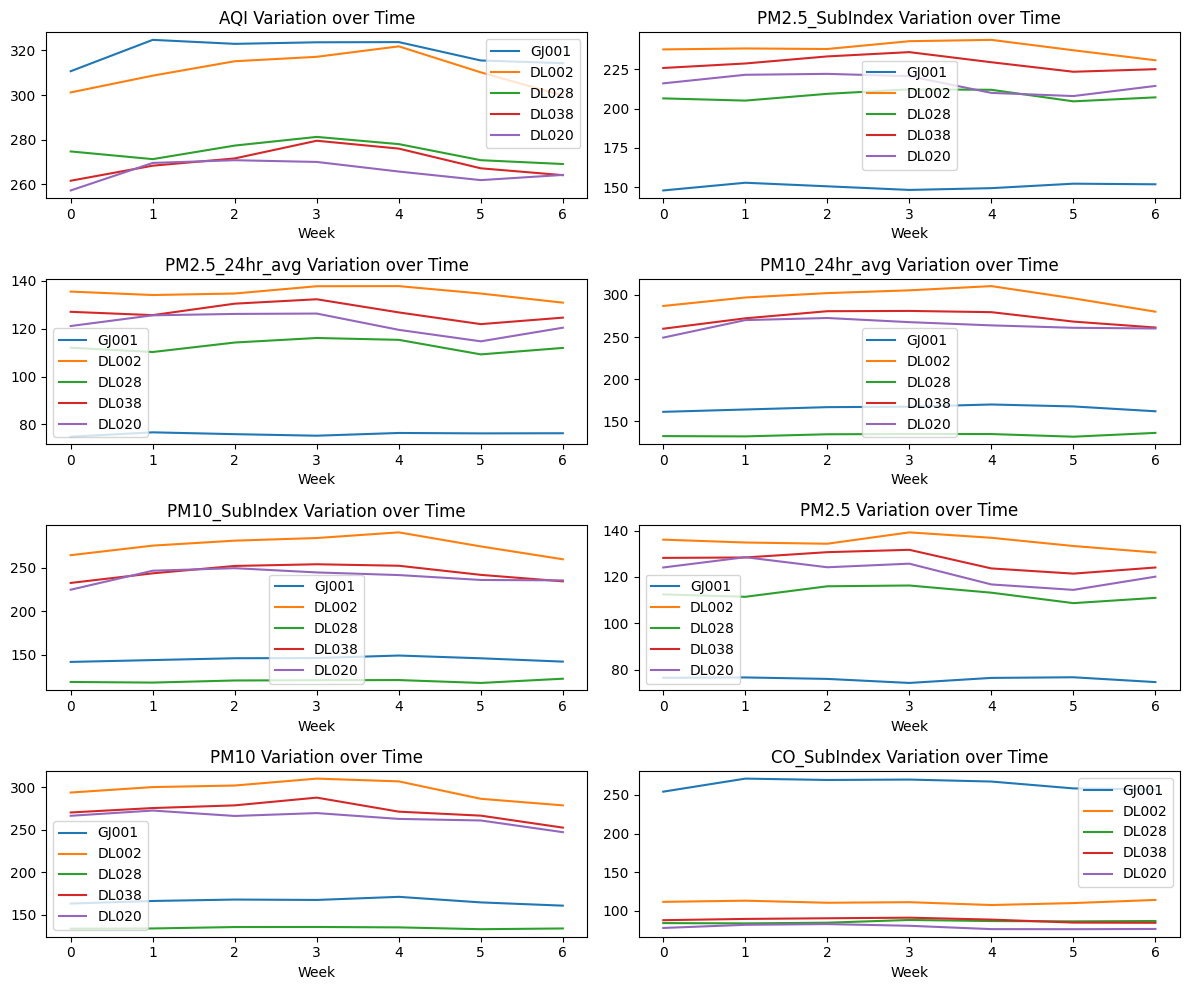

In [56]:
plot_(day_week, major_pollutants, most_polluted.index)

The pollution levels are generally consistent throughout the week, with only a slight variation observed on weekends. This pattern is expected, as human activities are typically reduced during weekends. However, it is important to note that some stations experience an increase in pollution levels during weekends, indicating that certain factors may contribute to higher pollution levels in those areas.

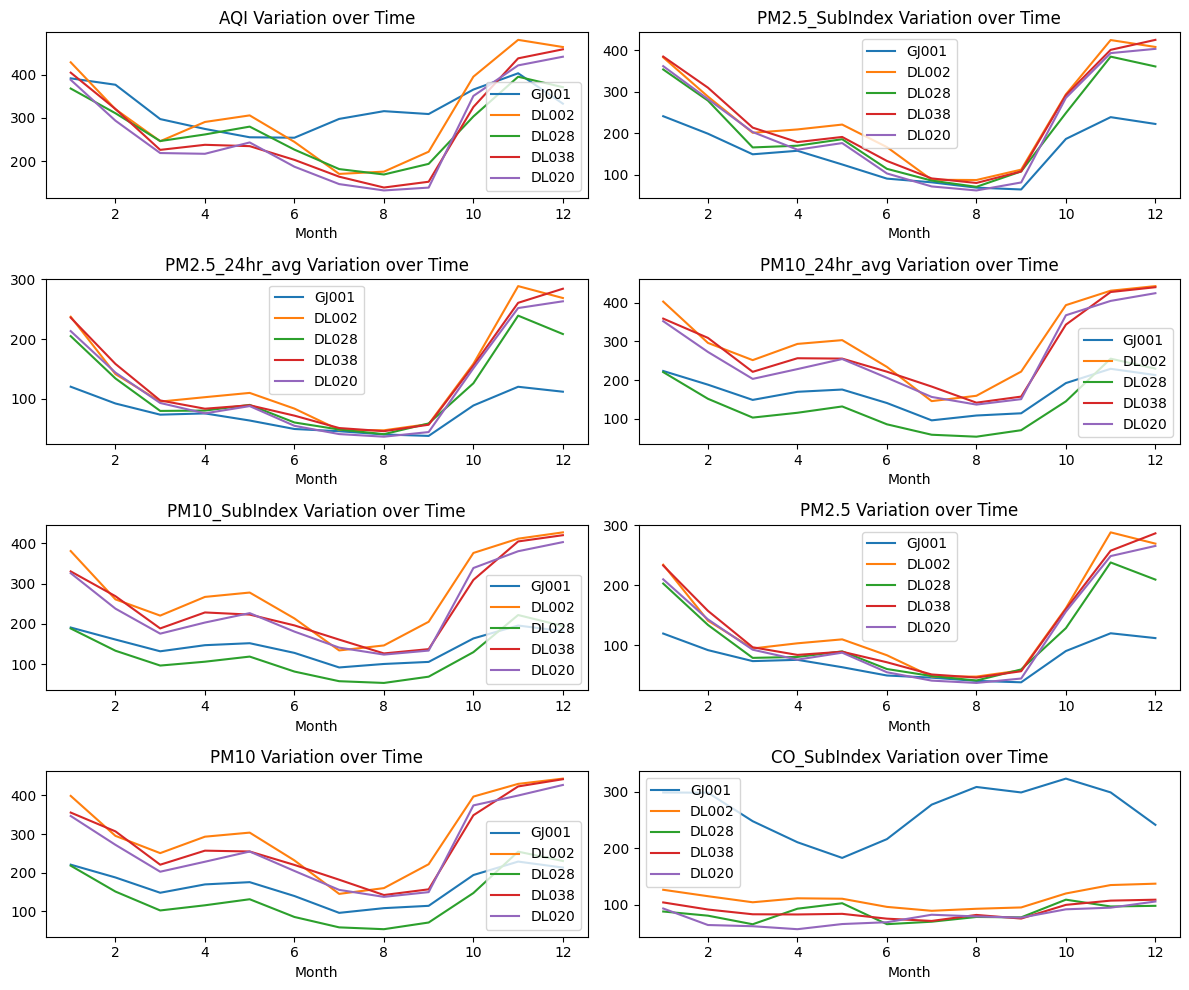

In [57]:
plot_(month_year, major_pollutants, most_polluted.index)

There is evident seasonality observed for most pollutants. It is evident that pollution levels tend to decrease during the summer season and increase during colder seasons.

### Trends in the data

In [67]:
daily = df4.groupby('StationId').resample('D')[major_pollutants].mean()
weekly = df4.groupby('StationId').resample('w')[major_pollutants].mean()
monthly = df4.groupby('StationId').resample('M')[major_pollutants].mean()
yearly = df4.groupby('StationId').resample('Y')[major_pollutants].mean()

In [60]:
daily.head(3)

AQI  PM2.5_SubIndex  PM2.5_24hr_avg   
StationId Datetime                                                 
AP001     2017-11-25  196.437500      196.326742       88.898023  \
          2017-11-26  205.416667      183.630903       85.089271   
          2017-11-27  204.375000      188.850868       86.655260   

                      PM10_24hr_avg  PM10_SubIndex       PM2.5        PM10   
StationId Datetime                                                           
AP001     2017-11-25     127.171607     118.114404   97.083750  136.788125  \
          2017-11-26     129.422101     119.614734   78.322917  129.062500   
          2017-11-27     137.114826     124.743218  111.780417  154.661250   

                      CO_SubIndex  
StationId Datetime                 
AP001     2017-11-25    34.375000  
          2017-11-26     9.125000  
          2017-11-27    38.723958

Let's plot the daily, weekly and monthly AQI time series together over a single 12-month period to compare them.

Text(0.5, 0.98, 'AQI of AP001')

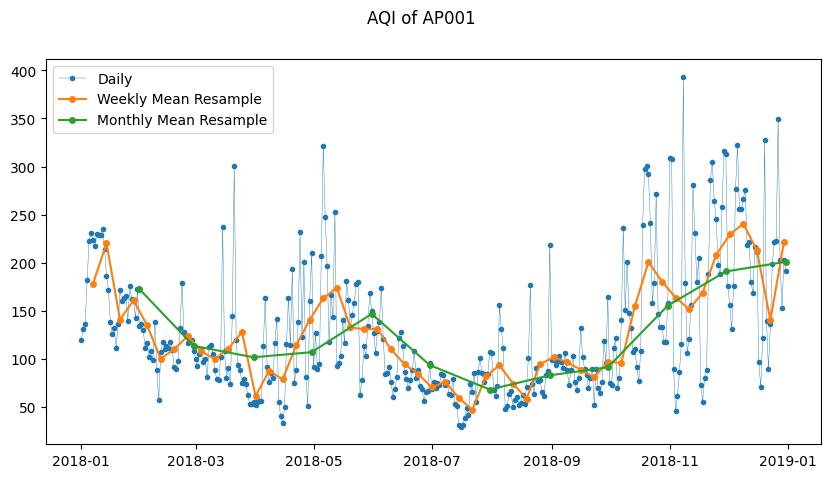

In [95]:
###### Start and end of the date range to extract
start, end = '2018-01', '2018-12'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily['AQI']['AP001'].loc[start:end], marker='.', linestyle='-', linewidth=0.3, label='Daily')
ax.plot(weekly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(monthly['AQI']['AP001'].loc[start:end], marker='.', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.legend();
plt.suptitle('AQI of AP001')

We can observe that the weekly mean time series appears smoother compared to the daily time series. This smoothing is a result of averaging out the higher frequency variability during the resampling process. Additionally, there doesn't seem to be a noticeable trend in the data.

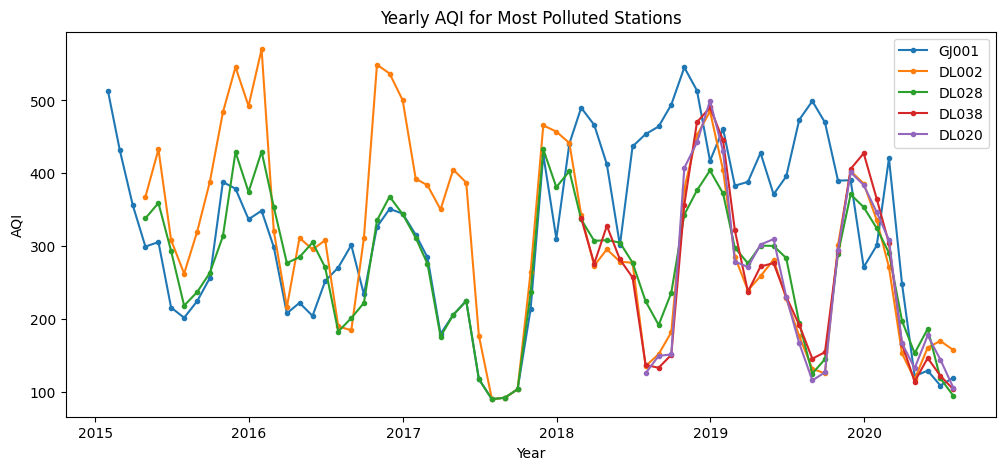

In [98]:
fig, ax = plt.subplots(figsize=(12, 5))

for station in most_polluted.index:
    ax.plot(monthly['AQI'].loc[station], marker='.', linestyle='-', label=station)

# Additional code for labeling and styling the plot
ax.set_xlabel('Year')
ax.set_ylabel('AQI')
ax.set_title('Yearly AQI for Most Polluted Stations')
ax.legend()

plt.show()

## 4. Feature Engineering

We will create some features based on our EDA above. Our earlier analysis has shown seasonality in during the time of the day, weekday/weekend, month and year.

Therefore, we will add new features Season, Year, Month, Part_of_Day, Is_Weekend to reflect the above.

Since we ruled out on a window less than a day(constant AQI throughout the day), we will use the daily resampled data.

In [44]:
df5 = df4.copy()

In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2584705 entries, 2017-11-25 08:00:00 to 2020-07-01 00:00:00
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   StationId       object 
 1   PM2.5           float64
 2   PM10            float64
 3   NO              float64
 4   NO2             float64
 5   NOx             float64
 6   NH3             float64
 7   CO              float64
 8   SO2             float64
 9   O3              float64
 10  Benzene         float64
 11  Toluene         float64
 12  Xylene          float64
 13  PM10_24hr_avg   float64
 14  PM2.5_24hr_avg  float64
 15  SO2_24hr_avg    float64
 16  NOx_24hr_avg    float64
 17  NH3_24hr_avg    float64
 18  CO_8hr_max      float64
 19  O3_8hr_max      float64
 20  PM2.5_SubIndex  float64
 21  PM10_SubIndex   float64
 22  SO2_SubIndex    float64
 23  NOx_SubIndex    float64
 24  NH3_SubIndex    float64
 25  CO_SubIndex     float64
 26  O3_SubIndex     float64
 27  Checks  

We will remove AQI_Becket since we can infer it's value with get_AQI_Bucket() function once AQI prediction is done.

In [46]:
df5 = df5.drop(['AQI_Bucket'], axis=1)

In [47]:
df5 = df5.groupby('StationId').resample('D').mean().reset_index()
df5

StationId   Datetime       PM2.5        PM10         NO        NO2   
0          AP001 2017-11-25   97.083750  136.788125   1.756875  22.628125  \
1          AP001 2017-11-26   78.322917  129.062500   1.255417  25.995833   
2          AP001 2017-11-27  111.780417  154.661250   9.397500  33.808750   
3          AP001 2017-11-28   91.430000  153.668333  25.286250  53.073750   
4          AP001 2017-11-29   71.177083  118.970833   5.228750  23.205000   
...          ...        ...         ...         ...        ...        ...   
107944     WB013 2020-06-27    8.651250   16.461667   6.299583  18.034583   
107945     WB013 2020-06-28   13.866667   18.875833  16.116250  14.934167   
107946     WB013 2020-06-29   20.087083   39.108750  18.993333  33.538333   
107947     WB013 2020-06-30   16.069167   39.302917  15.685000  21.261667   
107948     WB013 2020-07-01   10.500000   36.500000   7.780000  22.500000   

              NOx        NH3        CO        SO2  ...  NH3_SubIndex   
0       15.565000  11.985000  0.198125  16.628750  ...      2.965166  \
1       14.848333  10.279167  0.140417  26.964583  ...      2.755109   
2       41.526667  14.015833  0.657917  25.658750  ...      2.898368   
3       25.570417  39.244583  1.365000  15.060833  ...      8.227122   
4       16.586667  12.965000  0.162917  10.565417  ...      5.200356   
...           ...        ...       ...        ...  ...           ...   
107944  16.366250  17.696667  0.690000   4.364583  ...      5.014076   
107945  25.919583  24.148333  0.681250   3.490833  ...      5.228030   
107946  38.487500  16.212083  0.774583   5.122500  ...      5.261701   
107947  29.502500  27.783750  0.694167   5.877083  ...      5.315764   
107948  30.250000  27.230000  0.580000   2.800000  ...      7.139479   

        CO_SubIndex  O3_SubIndex  Checks         AQI    Year  Month  Week   
0         34.375000   178.391544     7.0  196.437500  2017.0   11.0   5.0  \
1          9.125000   193.332721     7.0  205.416667  2017.0   11.0   6.0   
2         38.723958   176.316213     7.0  204.375000  2017.0   11.0   0.0   
3        156.537071   155.996667     7.0  285.625000  2017.0   11.0   1.0   
4         18.166667   155.988725     7.0  192.166667  2017.0   11.0   2.0   
...             ...          ...     ...         ...     ...    ...   ...   
107944    40.270833    46.651250     7.0   49.833333  2020.0    6.0   5.0   
107945    38.833333    63.438333     7.0   65.291667  2020.0    6.0   6.0   
107946    42.020833    62.919167     7.0   63.041667  2020.0    6.0   0.0   
107947    43.937500    49.443750     7.0   57.125000  2020.0    6.0   1.0   
107948    40.500000    58.960000     7.0   59.000000  2020.0    7.0   2.0   

         Day  Hour  
0       25.0  15.5  
1       26.0  11.5  
2       27.0  11.5  
3       28.0  11.5  
4       29.0  11.5  
...      ...   ...  
107944  27.0  11.5  
107945  28.0  11.5  
107946  29.0  11.5  
107947  30.0  11.5  
107948   1.0   0.0  

[107949 rows x 35 columns]

Following the [indian season names](https://en.wikipedia.org/wiki/Climate_of_India), the following code creates a column 'Season'

In [50]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'pre-monsoon', 
               4: 'pre-monsoon',
               5: 'pre-monsoon',
               6: 'Monsoon',
               7: 'Monsoon',
               8: 'Monsoon',
               9: 'Monsoon',
               10: 'Post-monsoon',
               11: 'Post-monsoon',
               12: 'Post-monsoon'}
df5['Season'] = df5['Month'].apply(lambda x: season_dict[x])

In [51]:
def part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [52]:
df5['Part_of_Day'] = df5['Hour'].apply(lambda x: part_of_day(x))


In [54]:
df5["is_weekend"] = df5['Datetime'].dt.dayofweek > 4

## 5. Data Preprocessing
We will use StandardScaler for numerical attributes and Onehot encoding to transform categorical attributes. We will also split the data into train and test. 

Using temporal variable is a more reliable way of splitting datasets whenever the dataset includes the date variable, and we want to predict something in the future that depends on date. 
Here we are going to split the dataframe into 85% train and 15%.

In [337]:
# copy of dataset
df6 = df5.copy()

In [338]:
df6.sort_values(by=['Datetime','StationId'])

StationId   Datetime     PM2.5    PM10         NO      NO2        NOx   
11891      DL007 2015-01-01  357.2650  558.18   40.07250  46.2100   86.28375  \
13900      DL008 2015-01-01  360.6225  558.18   59.90625  40.3125   70.18750   
20260      DL013 2015-01-01  203.6875  558.18   21.13000  12.3125   28.07125   
30586      DL021 2015-01-01  360.6225  558.18  151.69875  80.3125  280.09625   
44502      DL033 2015-01-01  360.6225  558.18  151.78625  38.2500  223.38125   
...          ...        ...       ...     ...        ...      ...        ...   
105808     WB009 2020-07-01   10.5200   34.55    1.75000  11.0200   12.78000   
106202     WB010 2020-07-01   14.7000   29.00    3.10000   6.7800    9.88000   
106805     WB011 2020-07-01   12.5700   41.40   18.00000  13.7000   31.70000   
107135     WB012 2020-07-01    8.3800   36.18    4.53000   6.8500   11.38000   
107948     WB013 2020-07-01   10.5000   36.50    7.78000  22.5000   30.25000   

             NH3        CO      SO2  ...  Checks    AQI    Year  Month  Week   
11891   17.42125   0.75125  69.2375  ...     7.0  675.0  2015.0    1.0   3.0  \
13900   23.93750   7.02125  69.2375  ...     7.0  675.0  2015.0    1.0   3.0   
20260   44.98125  20.00000  18.1250  ...     7.0  675.0  2015.0    1.0   3.0   
30586   17.42125  22.68750  17.6875  ...     7.0  675.0  2015.0    1.0   3.0   
44502   17.42125  10.37625  10.8750  ...     7.0  675.0  2015.0    1.0   3.0   
...          ...       ...      ...  ...     ...    ...     ...    ...   ...   
105808   3.07000   0.23000   3.1200  ...     7.0   38.0  2020.0    7.0   2.0   
106202   6.78000   0.33000   3.2300  ...     7.0   35.0  2020.0    7.0   2.0   
106805  28.73000   0.21000   8.3600  ...     7.0   62.0  2020.0    7.0   2.0   
107135   7.95000   0.16000   5.5000  ...     7.0   39.0  2020.0    7.0   2.0   
107948  27.23000   0.58000   2.8000  ...     7.0   59.0  2020.0    7.0   2.0   

        Day  Hour   Season  Part_of_Day  is_weekend  
11891   1.0  19.5   Winter      evening       False  
13900   1.0  19.5   Winter      evening       False  
20260   1.0  19.5   Winter      evening       False  
30586   1.0  19.5   Winter      evening       False  
44502   1.0  19.5   Winter      evening       False  
...     ...   ...      ...          ...         ...  
105808  1.0   0.0  Monsoon        night       False  
106202  1.0   0.0  Monsoon        night       False  
106805  1.0   0.0  Monsoon        night       False  
107135  1.0   0.0  Monsoon        night       False  
107948  1.0   0.0  Monsoon        night       False  

[107949 rows x 38 columns]

In [339]:
df6['Datetime'].max() - df6['Datetime'].min()

Timedelta('2008 days 00:00:00')

We will also do the splitting before using transformations.

In [340]:
split_tp = df6['Datetime'].max() - datetime.timedelta( days = 150)

Training dataset is:

In [395]:
# Train dataset
X_train = df6[df6['Datetime'] < split_tp]
y_train = X_train['AQI']

Validation datset is:

In [342]:
# Validation dataset
X_validation = df6[df6['Datetime'] >= split_tp]
y_validation = X_validation['AQI']

print( 'Training Min Date: {}'.format( X_train['Datetime'].min() ) )
print( 'Training Max Date: {}'.format( X_train['Datetime'].max() ) )

print( '\nValidation Min Date: {}'.format( X_validation['Datetime'].min() ) )
print( 'Validation Max Date: {}'.format( X_validation['Datetime'].max() ) )
X_train.head(2)

Training Min Date: 2015-01-01 00:00:00
Training Max Date: 2020-02-01 00:00:00

Validation Min Date: 2020-02-02 00:00:00
Validation Max Date: 2020-07-01 00:00:00


StationId   Datetime      PM2.5        PM10        NO        NO2        NOx   
0     AP001 2017-11-25  97.083750  136.788125  1.756875  22.628125  15.565000  \
1     AP001 2017-11-26  78.322917  129.062500  1.255417  25.995833  14.848333   

         NH3        CO        SO2  ...  Checks         AQI    Year  Month   
0  11.985000  0.198125  16.628750  ...     7.0  196.437500  2017.0   11.0  \
1  10.279167  0.140417  26.964583  ...     7.0  205.416667  2017.0   11.0   

   Week   Day  Hour        Season  Part_of_Day  is_weekend  
0   5.0  25.0  15.5  Post-monsoon    afternoon        True  
1   6.0  26.0  11.5  Post-monsoon        night        True  

[2 rows x 38 columns]

In [401]:
# check the proportion of validation data datapoints
X_validation.shape[0]/df6.shape[0] * 100

14.945946697051385

In [402]:
X_validation[['StationId', 'Datetime']].shape[0]/df6[['StationId', 'Datetime']].shape[0]

0.14945946697051385

Now let's normalize the features

In [345]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#X= df1.drop(['AQI', 'AQI_Bucket'], axis= 1)
#y= df1['AQI']

num_attributes = df6.select_dtypes( include = 'number')
cat_attributes = df6.select_dtypes( include = ['object', 'boolean'])

print(num_attributes.columns)
print(cat_attributes.columns)


Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'PM10_24hr_avg', 'PM2.5_24hr_avg',
       'SO2_24hr_avg', 'NOx_24hr_avg', 'NH3_24hr_avg', 'CO_8hr_max',
       'O3_8hr_max', 'PM2.5_SubIndex', 'PM10_SubIndex', 'SO2_SubIndex',
       'NOx_SubIndex', 'NH3_SubIndex', 'CO_SubIndex', 'O3_SubIndex', 'Checks',
       'AQI', 'Year', 'Month', 'Week', 'Day', 'Hour'],
      dtype='object')
Index(['StationId', 'Season', 'Part_of_Day', 'is_weekend'], dtype='object')


In [346]:
Scaler = StandardScaler()
for att in num_attributes:
    X_train[att] = Scaler.fit_transform( X_train[[att]].values )


For categorical attributes:

In [404]:
label_encoder = LabelEncoder()

# Iterate over each categorical attribute
for att in cat_attributes:
    X_train[att] = label_encoder.fit_transform( X_train[[att]].values)         

# is_weekend
#X_train['is_weekend'] = X_train['is_weekend'].apply(lambda x: 1 if x == True else 0)

In [405]:
X_train.head(2)

StationId   Datetime      PM2.5        PM10        NO        NO2   
0          0 2017-11-25  97.083750  136.788125  1.756875  22.628125  \
1          0 2017-11-26  78.322917  129.062500  1.255417  25.995833   

         NOx        NH3        CO        SO2  ...  Checks         AQI    Year   
0  15.565000  11.985000  0.198125  16.628750  ...     7.0  196.437500  2017.0  \
1  14.848333  10.279167  0.140417  26.964583  ...     7.0  205.416667  2017.0   

   Month  Week   Day  Hour  Season  Part_of_Day  is_weekend  
0   11.0   5.0  25.0  15.5       1            0           1  
1   11.0   6.0  26.0  11.5       1            3           1  

[2 rows x 38 columns]

In [406]:
X_validation.head(2)

StationId   Datetime      PM2.5        PM10         NO       NO2   
799          1 2020-02-02  40.599451  152.056856 -32.261781  0.835245  \
800          1 2020-02-03  51.110104  141.925113 -32.144813  2.996683   

          NOx        NH3         CO        SO2  ...   day_sin   day_cos   
799  4.474435   7.400284 -43.424819   6.113636  ... -0.999761 -0.021868  \
800 -8.846747  11.780822 -43.375396  14.418369  ... -0.692229  0.721677   

     month_sin  month_cos  week_sin  week_cos  Part_of_Day_sin   
799  -0.744692   0.667408 -0.650484  0.759520              1.0  \
800  -0.744692   0.667408  0.010881 -0.999941              1.0   

     Part_of_Day_cos  season_sin    season_cos  
799     6.123234e-17         1.0  6.123234e-17  
800     6.123234e-17         1.0  6.123234e-17  

[2 rows x 50 columns]

Apply transformation for validation dataset

In [407]:
for att in num_attributes:
    X_validation[att] = Scaler.transform(X_validation[[att]].values)
    
for att in cat_attributes:
     X_validation[att] = label_encoder.transform(X_validation[[att]].values ) 

#X_validation['is_weekend'] = X_validation['is_weekend'].apply(lambda x: 1 if x == True else 0)

The target variable after transformation

Since the response variable has a skewed distribution, applying a log transformation can help to achieve uniformity in the data distribution.

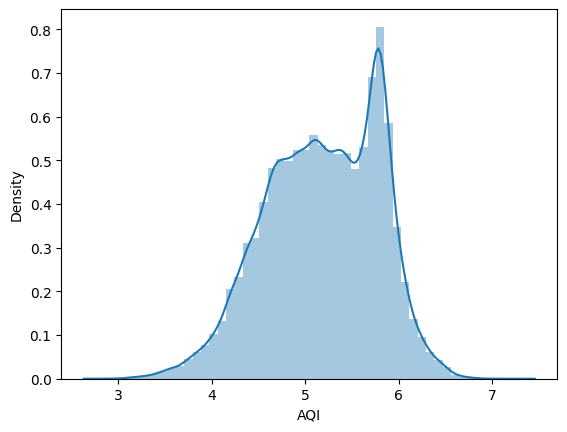

In [409]:
#tr = X_train.copy()
#tr['AQI'] = np.log1p( X_train['AQI'] )
X_train['AQI'] = np.log1p( X_train['AQI'] )
#sns.distplot(tr['AQI']);
sns.distplot(X_train['AQI']);

Nature transformation

In [410]:
# Hour 
X_train['hour_sin'] = X_train['Hour'].apply( lambda x: np.sin( x * ( 2. * np.pi/24 ) ) )
X_train['hour_cos'] = X_train['Hour'].apply( lambda x: np.cos( x * ( 2. * np.pi/24 ) ) )

# day 
X_train['day_sin'] = X_train['Day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
X_train['day_cos'] = X_train['Day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

# month
X_train['month_sin'] = X_train['Month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
X_train['month_cos'] = X_train['Month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

# day of week
X_train['week_sin'] = X_train['Week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
X_train['week_cos'] = X_train['Week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

# Part of day
X_train['Part_of_Day_sin'] = X_train['Part_of_Day'].apply( lambda x: np.sin( x * ( 2. * np.pi/4 ) ) )
X_train['Part_of_Day_cos'] = X_train['Part_of_Day'].apply( lambda x: np.cos( x * ( 2. * np.pi/4 ) ) )

# season
X_train['season_sin'] = X_train['Season'].apply( lambda x: np.sin( x * ( 2. * np.pi/4 ) ) )
X_train['season_cos'] = X_train['Season'].apply( lambda x: np.cos( x * ( 2. * np.pi/4 ) ) )

For validation data

In [ ]:
# Hour 
X_validation['hour_sin'] = X_validation['Hour'].apply( lambda x: np.sin( x * ( 2. * np.pi/24 ) ) )
X_validation['hour_cos'] = X_validation['Hour'].apply( lambda x: np.cos( x * ( 2. * np.pi/24 ) ) )

# day 
X_validation['day_sin'] = X_validation['Day'].apply( lambda x: np.sin( x * ( 2. * np.pi/30 ) ) )
X_validation['day_cos'] = X_validation['Day'].apply( lambda x: np.cos( x * ( 2. * np.pi/30 ) ) )

# month
X_validation['month_sin'] = X_validation['Month'].apply( lambda x: np.sin( x * ( 2. * np.pi/12 ) ) )
X_validation['month_cos'] = X_validation['Month'].apply( lambda x: np.cos( x * ( 2. * np.pi/12 ) ) )

# day of week
X_validation['week_sin'] = X_validation['Week'].apply( lambda x: np.sin( x * ( 2. * np.pi/7 ) ) )
X_validation['week_cos'] = X_validation['Week'].apply( lambda x: np.cos( x * ( 2. * np.pi/7 ) ) )

# Part of day
X_validation['Part_of_Day_sin'] = X_validation['Part_of_Day'].apply( lambda x: np.sin( x * ( 2. * np.pi/4 ) ) )
X_validation['Part_of_Day_cos'] = X_validation['Part_of_Day'].apply( lambda x: np.cos( x * ( 2. * np.pi/4 ) ) )

# season
X_validation['season_sin'] = X_validation['Season'].apply( lambda x: np.sin( x * ( 2. * np.pi/4 ) ) )
X_validation['season_cos'] = X_validation['Season'].apply( lambda x: np.cos( x * ( 2. * np.pi/4 ) ) )

In [436]:
# target variable
X_validation['AQI'] = np.log1p(X_validation['AQI'] )

In [437]:
# new y_train with target variable rescaled
y_validation = X_validation['AQI']

y_train = X_train['AQI'] 

## 6. Feature selection

Selecting the most relevant features that describe our dataset involves removing collinear features, which essentially convey the same information. For simplicity, we will use simple models at this stage.

In [440]:
df7 = X_train.copy()

In [441]:
# deleting features after feature engineering derivation and transformations. Deleting original variables.
cols_drop = ['Week', 'Day', 'Month', 'Year', 'Season', 'Part_of_Day']
df7 = df7.drop(cols_drop, axis = 1)

In [442]:
nan_rows = df7['AQI'].isnull()

# Remove rows with NaN values from both X_train and y_train
df7 = df7[~nan_rows]

In [443]:
df7.isna().sum()

StationId          0
Datetime           0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
Benzene            0
Toluene            0
Xylene             0
PM10_24hr_avg      0
PM2.5_24hr_avg     0
SO2_24hr_avg       0
NOx_24hr_avg       0
NH3_24hr_avg       0
CO_8hr_max         0
O3_8hr_max         0
PM2.5_SubIndex     0
PM10_SubIndex      0
SO2_SubIndex       0
NOx_SubIndex       0
NH3_SubIndex       0
CO_SubIndex        0
O3_SubIndex        0
Checks             0
AQI                0
Hour               0
is_weekend         0
hour_sin           0
hour_cos           0
day_sin            0
day_cos            0
month_sin          0
month_cos          0
week_sin           0
week_cos           0
Part_of_Day_sin    0
Part_of_Day_cos    0
season_sin         0
season_cos         0
dtype: int64

#### Best Features from Boruta

In [417]:
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
# creating training and test dataset for Boruta, because it can't be a dataframe type

X_train_n = df7.drop( ['Datetime', 'AQI'], axis=1 ).values
y_train_n = y_train.values.ravel()

# Define RandomForestRegressor
rf = RandomForestRegressor( n_jobs=-1 )

# Define Boruta
boruta = BorutaPy( rf, n_estimators='auto', verbose=2, random_state=42 ).fit( X_train_n, y_train_n )

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	42
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	15
Iteration: 	9 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	15
Iteration: 	10 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	15
Iteration: 	11 / 100
Confirmed: 	24
Tentative: 	3
Rejected: 	15
Iteration: 	12 / 100
Confirmed: 	24
Tentative: 	1
Rejected: 	17
Iteration: 	13 / 100
Confirmed: 	24
Tentative: 	1
Rejected: 	17
Iteration: 	14 / 100
Confirmed: 	24
Tentative: 	1
Rejected: 	17
Iteration: 	15 / 100
Confirmed: 	24
Tentative: 	1
Rejected: 	17
Iteration: 	16 / 100
Confirmed: 	24
Tentative: 	1
Reject

In [418]:
cols_selected = boruta.support_.tolist()

X_train_fs = df7.drop(['Datetime', 'AQI'], axis = 1)
cols_selected_boruta = X_train_fs.iloc[ :, cols_selected].columns.tolist()

# Not selected boruta features
cols_not_selected_boruta = np.setdiff1d(X_train_fs.columns, cols_selected_boruta)
pd.DataFrame(data = cols_selected_boruta, columns = ['feature_selected'])

feature_selected
0             PM2.5
1              PM10
2                NO
3               NO2
4               NOx
5               NH3
6                CO
7               SO2
8                O3
9           Benzene
10          Toluene
11           Xylene
12    PM10_24hr_avg
13   PM2.5_24hr_avg
14     NOx_24hr_avg
15       CO_8hr_max
16       O3_8hr_max
17   PM2.5_SubIndex
18    PM10_SubIndex
19     NOx_SubIndex
20      CO_SubIndex
21      O3_SubIndex
22          day_sin
23          day_cos

#### Best Features from Random Forest

In [419]:
X_train_rf = df7.drop( ['Datetime', 'AQI'], axis=1 ).copy()
y_train_rf = df7['AQI'].copy()

# train random forest classifier
rf = RandomForestRegressor(n_estimators = 200, n_jobs =-1, random_state = 42)
rf.fit(X_train_rf, y_train_rf)

# feature importance data frame
feat_imp = pd.DataFrame({'feature': X_train_rf.columns,
                        'feature_importance': rf.feature_importances_})\
                        .sort_values('feature_importance', ascending=False)\
                        .reset_index(drop=True)

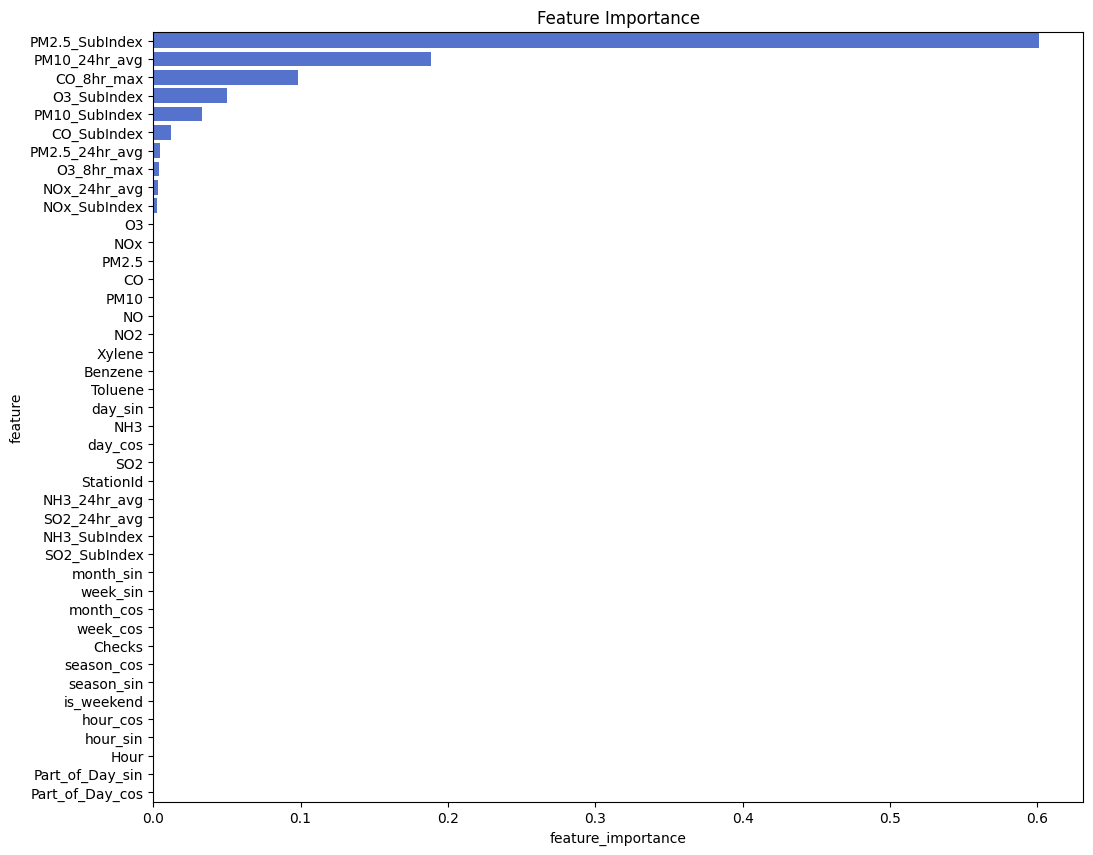

In [420]:
# plot feature importance
plt.subplots(figsize=(12,10))
sns.barplot(x='feature_importance', y='feature', data=feat_imp, orient='h', color='royalblue')\
    .set_title('Feature Importance');

In [421]:
feat_imp = feat_imp[:10]

The final features are selected combining the two results adding Benzene, Xylene, Toluene to the features selected by Random Forest since the other feature selected based on boruta are already represented by subIndex and averages. 

We can see that PM2.5_SubIndex has high importance than the remaining features. It is a good idea to do the **only based on one feature (PM2.5_SubIndex)** and compare the results. 

In [422]:
feat_imp.set_index('feature')

feature_importance
feature                           
PM2.5_SubIndex            0.601193
PM10_24hr_avg             0.188328
CO_8hr_max                0.098081
O3_SubIndex               0.050359
PM10_SubIndex             0.032976
CO_SubIndex               0.012207
PM2.5_24hr_avg            0.004498
O3_8hr_max                0.004010
NOx_24hr_avg              0.002974
NOx_SubIndex              0.002535

In [427]:
# columns to add
feat_to_add = ['Benzene', 'Xylene', 'Toluene', 'StationId', 'Datetime', 'AQI']

# final features
final_features = pd.concat([pd.Series(feat_to_add), feat_imp['feature']])
#final_features.extend( feat_to_add )
print(final_features)

0           Benzene
1            Xylene
2           Toluene
3         StationId
4          Datetime
5               AQI
0    PM2.5_SubIndex
1     PM10_24hr_avg
2        CO_8hr_max
3       O3_SubIndex
4     PM10_SubIndex
5       CO_SubIndex
6    PM2.5_24hr_avg
7        O3_8hr_max
8      NOx_24hr_avg
9      NOx_SubIndex
dtype: object


In [428]:
X_train

StationId   Datetime       PM2.5        PM10         NO        NO2   
0               0 2017-11-25   97.083750  136.788125   1.756875  22.628125  \
1               0 2017-11-26   78.322917  129.062500   1.255417  25.995833   
2               0 2017-11-27  111.780417  154.661250   9.397500  33.808750   
3               0 2017-11-28   91.430000  153.668333  25.286250  53.073750   
4               0 2017-11-29   71.177083  118.970833   5.228750  23.205000   
...           ...        ...         ...         ...        ...        ...   
107793        103 2020-01-28  133.145000  231.777083  88.824583  90.479167   
107794        103 2020-01-29   54.907917   89.169583   1.746667  40.463750   
107795        103 2020-01-30   60.808750  107.190833  32.665833  47.236250   
107796        103 2020-01-31   77.214583  154.479167  81.585833  59.868750   
107797        103 2020-02-01   75.169583  150.655000  83.388333  66.632917   

               NOx        NH3        CO        SO2  ...       day_sin   
0        15.565000  11.985000  0.198125  16.628750  ... -8.660254e-01  \
1        14.848333  10.279167  0.140417  26.964583  ... -7.431448e-01   
2        41.526667  14.015833  0.657917  25.658750  ... -5.877853e-01   
3        25.570417  39.244583  1.365000  15.060833  ... -4.067366e-01   
4        16.586667  12.965000  0.162917  10.565417  ... -2.079117e-01   
...            ...        ...       ...        ...  ...           ...   
107793  126.688750  28.105417  0.422500  10.471667  ... -4.067366e-01   
107794   42.165833  21.469583  0.365000   3.821667  ... -2.079117e-01   
107795   79.896250  17.534167  0.677500   4.210417  ... -2.449294e-16   
107796  138.255417  19.615417  0.472917   7.978750  ...  2.079117e-01   
107797   94.422083  25.176250  0.459583   8.729583  ...  2.079117e-01   

         day_cos  month_sin  month_cos  week_sin  week_cos  Part_of_Day_sin   
0       0.500000  -0.500000   0.866025 -0.974928 -0.222521              0.0  \
1       0.669131  -0.500000   0.866025 -0.781831  0.623490             -1.0   
2       0.809017  -0.500000   0.866025  0.000000  1.000000             -1.0   
3       0.913545  -0.500000   0.866025  0.781831  0.623490             -1.0   
4       0.978148  -0.500000   0.866025  0.974928 -0.222521             -1.0   
...          ...        ...        ...       ...       ...              ...   
107793  0.913545   0.500000   0.866025  0.781831  0.623490             -1.0   
107794  0.978148   0.500000   0.866025  0.974928 -0.222521             -1.0   
107795  1.000000   0.500000   0.866025  0.433884 -0.900969             -1.0   
107796  0.978148   0.500000   0.866025 -0.433884 -0.900969             -1.0   
107797  0.978148   0.866025   0.500000 -0.974928 -0.222521             -1.0   

        Part_of_Day_cos    season_sin    season_cos  
0          1.000000e+00  1.000000e+00  6.123234e-17  
1         -1.836970e-16  1.000000e+00  6.123234e-17  
2         -1.836970e-16  1.000000e+00  6.123234e-17  
3         -1.836970e-16  1.000000e+00  6.123234e-17  
4         -1.836970e-16  1.000000e+00  6.123234e-17  
...                 ...           ...           ...  
107793    -1.836970e-16  1.224647e-16 -1.000000e+00  
107794    -1.836970e-16  1.224647e-16 -1.000000e+00  
107795    -1.836970e-16  1.224647e-16 -1.000000e+00  
107796    -1.836970e-16  1.224647e-16 -1.000000e+00  
107797    -1.836970e-16  1.224647e-16 -1.000000e+00  

[91815 rows x 50 columns]

In [479]:
# Applying selected features by boruta on train and validation datasets
x_train = X_train[final_features].copy()
x_validation = X_validation[final_features].copy()

# Time Series Data Preparation for cross-validation
x_training = df7[final_features].copy()

## 7. Model Design and Training

Machine learning algorithms predict a single value and cannot be used directly for multi-step forecasting. We can use recursive method to predict multiple point at a time.

We will train several models and select the best performing one for deployment.

##### Five different algorithms are going to be used to predict the target variable:

-  **Average:** averaging model is the model we use most in everyday life, it will always predict the average. It is useful as it is a comparative basis for implementing other models

 - **Logistic Regression:** uses a complex cost function, which can be defined as the Sigmoid function. The output of the classification is based on the probability score between 0 and 1 of the input being in one class or another according to a threshold

 - **Random Forest:** it is a tree based model build with multiple ensamble decision trees created with the bagging method. Then, all the classifiers take a weighted vote on their predictions. Since the algorithm goal is not trying to find a linear function to describe the event, it works for problems with more complex behaviour

 - **XGBoost:** it is also a tree based model but they are built in a different way. While Random Forests builds each tree independently, XGBoost builds one tree at the time learning with its predecessor.
 - LightGBM: is a gradient boosting framework that uses tree based learning algorithms.

Let's define some helper functions and pipeline the training and evaluation.

In [463]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso,SGDRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgbm

def mean_absolute_percentage_error( y, yhat ):
    y, yhat = np.array(y), np.array(yhat)
    return np.mean( np.abs( ( y-yhat ) / y ))

def mean_percentage_error( y, yhat ):
    return np.mean( ( y - yhat ) / y )

# Define the function to evaluate the models
def weighted_mean_absolute_error(df, y, yhat):
    weights = 1
    return np.round(np.sum(weights*abs(y-yhat))/(np.sum(weights)), 2)

def ml_error( df, model_name, y, yhat):
    mae = mean_absolute_error( y,yhat )
    mape = mean_absolute_percentage_error( y,yhat )
    rmse = np.sqrt(mean_squared_error( y,yhat ))
    WMAE = weighted_mean_absolute_error(df, y, yhat)
    
    return pd.DataFrame( {'Model Name': model_name,
                          'MAE': mae,
                          'RMSE': rmse,
                          'WMAE': WMAE}, index=[0])

# time-series cross validation implementation
def cross_validation( x_training, kfold, model_name, model, sp, verbose=False ):
    mae_list = []
    mape_list = []
    rmse_list = []
    WMAE_list = []
     
    for k in reversed( range( 1, kfold+1 ) ): #k-fold implementation
        if verbose:
            print( '\nKFold Number: {}'.format( k ) )
        # start and end date for validation 
        start_date_validation = x_training['date'].max() - datetime.timedelta( days=k*sp) 
        end_date_validation = x_training['date'].max() - datetime.timedelta( days=(k-1)*sp)

        # filtering dataset
        training = x_training[x_training['date'] < start_date_validation]
        validation = x_training[(x_training['date'] >= start_date_validation) 
                                & (x_training['date'] <= end_date_validation)]

        # training and validation dataset
        # training
        xtraining = training.drop( ['Datetime', 'AQI'], axis=1 ) 
        ytraining = training['AQI']

        # validation
        xvalidation = validation.drop( ['Datetime', 'AQI'], axis=1 )
        yvalidation = validation['AQI']

        # model
        m = model.fit( xtraining, ytraining )

        # prediction
        yhat = m.predict(xvalidation)

        # performance
        m_result = ml_error( xvalidation, model_name, np.expm1( yvalidation ), np.expm1( yhat ) )

        # store performance of each kfold iteration
        mae_list.append(  m_result['MAE'] )
        rmse_list.append( m_result['RMSE'] )
        WMAE_list.append( m_result['WMAE'])

    return pd.DataFrame( {'Model Name': model_name,
                          'MAE CV':  np.round( np.mean( mae_list ), 2 ).astype( str )  
                          + ' +/- ' + np.round( np.std( mae_list ), 2 ).astype( str ),
                          'RMSE CV': np.round( np.mean( rmse_list ), 2 ).astype( str ) 
                          + ' +/- ' + np.round( np.std( rmse_list ), 2 ).astype( str ),
                          'WMAE CV': np.round( np.mean( WMAE_list ), 2 ).astype( str ) 
                          + ' +/- ' + np.round( np.std( WMAE_list ), 2 ).astype( str )}, index=[0] )




# prepare a list of ml models
def get_models(models=dict()):
    # linear models
    models['lr'] = LinearRegression()
    models['lasso'] = Lasso()
    models['rf'] = RandomForestRegressor( n_estimators = 100, n_jobs =-1, random_state=7 )
    models['xgb'] = xgb.XGBRegressor( objective='reg:squarederror', n_estimators = 100, random_state=7)
    models['lgbm'] = lgbm.LGBMRegressor(n_estimators = 100, n_jobs =-1, random_state=7)
    print('Defined %d models' % len(models))
    return models

#### Average model

In [480]:
aux1 = x_validation.copy()
aux1['AQI'] = y_validation.copy()

In [481]:
aux1

Benzene      Xylene     Toluene  StationId   Datetime       AQI   
799    -219.148466 -215.989310 -193.184765          1 2020-02-02  6.277460  \
800    -219.910571 -223.004590 -210.563379          1 2020-02-03  6.471456   
801    -219.760756 -210.719708 -212.608688          1 2020-02-04  6.430315   
802    -220.242771 -211.957315 -215.051334          1 2020-02-05  6.418699   
803    -219.083329 -220.900657 -207.593121          1 2020-02-06  6.565630   
...            ...         ...         ...        ...        ...       ...   
107944 -204.785706 -218.412415 -112.043316          1 2020-06-27  6.318213   
107945 -203.313605 -215.793898 -101.653927          1 2020-06-28  6.679901   
107946 -170.425817 -166.771618  -90.443810          1 2020-06-29  6.634720   
107947 -196.448141 -202.525444  -94.156632          1 2020-06-30  6.505143   
107948 -204.981118 -160.114593 -109.932870          1 2020-07-01  6.548051   

        PM2.5_SubIndex  PM10_24hr_avg  CO_8hr_max  O3_SubIndex  PM10_SubIndex   
799         293.016268     446.240297 -214.269687   470.146747     446.240297  \
800         410.939536     590.593902 -212.680339   507.691847     590.593902   
801         474.685817     548.356478 -215.012252   481.923558     548.356478   
802         467.165633     517.965888 -215.168581   534.372057     517.965888   
803         460.911102     582.010714 -209.827328   540.247436     582.010714   
...                ...            ...         ...          ...            ...   
107944       60.004559      68.485336 -212.869237   503.835723      68.485336   
107945       88.832307      60.111673 -213.318684   766.267116      60.111673   
107946      151.578912     169.121545 -212.322084   758.151017     169.121545   
107947      307.410239     450.770049 -211.722821   547.490696     450.770049   
107948      180.626951     377.886372 -212.797586   696.257619     377.886372   

        CO_SubIndex  PM2.5_24hr_avg  O3_8hr_max  NOx_24hr_avg  NOx_SubIndex  
799      334.068556       85.625656  470.146747    -97.955761    -66.079635  
800      413.535979      156.379616  507.691847    -26.061899     23.787693  
801      296.940334      194.627385  481.923558    -62.342794    -21.563426  
802      289.123866      190.115274  534.372057    -92.654676    -59.453279  
803      556.186516      186.362556  540.247436    -26.048328     23.804655  
...             ...             ...         ...           ...           ...  
107944   404.091080      -54.181370  503.835723     64.822452    137.393131  
107945   381.618735      -36.884721  766.267116     92.089983    171.477545  
107946   431.448718        0.763242  758.151017    253.759506    373.564449  
107947   461.411844       94.262038  547.490696    322.456216    459.435336  
107948   407.673628       18.192065  696.257619    249.930794    368.778559  

[16134 rows x 16 columns]

In [477]:
# Predictions
aux2 = aux1[['StationId', 'AQI']].groupby('StationId').mean().reset_index().rename(columns = {'AQI': 'predictions'})
aux1 = pd.merge( aux1, aux2, how= 'left', on='StationId')
yhat_baseline = aux1['predictions']

In [453]:
# Performance
baseline_result = ml_error( aux1 ,'Average Model', np.expm1( y_validation ), np.expm1( yhat_baseline ))
baseline_result

Model Name         MAE         RMSE        WMAE
0  Average Model  729.445976  1095.910434  2226742.65

In [482]:
x_validation = x_validation.drop(['Datetime'], axis=1)

In [485]:
x_train = x_train.drop(['Datetime'], axis=1)

In [489]:
# Prepare, train and evaluate the ML models
models = get_models()

trained_models ={}
result = {}
for name, model in models.items():
    trained_models[name] = model.fit(x_train, y_train)
    
    # Prediction 
    yhat = model.predict(x_validation)
    
    #Evaluation
    result[name]= ml_error( x_validation, name, np.expm1(y_validation), np.expm1(yhat))


Defined 5 models


In [508]:
results=baseline_result.copy()

In [509]:
for name, model in models.items():
    results = pd.concat([results, result[name]])

In [511]:
results.set_index('Model Name').sort_values('RMSE')

MAE          RMSE          WMAE
Model Name                                             
lr             3.581889e-10  5.860661e-10  0.000000e+00
xgb            5.508898e+02  1.060549e+03  8.888056e+06
Average Model  7.294460e+02  1.095910e+03  2.226743e+06
rf             7.473813e+02  1.225239e+03  1.205825e+07
lgbm           1.069358e+03  1.495407e+03  1.725301e+07
lasso          4.530090e+15  4.654170e+17  7.308848e+19

In [ ]:
import joblib
joblib.dump(model, "model/best_model.pkl")

## 8. Deployment

# Things To-Do
- **Check the training result and improve performance**
- **Tune best model**
- **Test deployed model**
- **Write documentation**
